In [153]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer #операции со столбцами в дата фрейме
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
# Импортируем данныe

df_nup = pd.read_excel("dataset/X_nup.xlsx")
df_bp = pd.read_excel("dataset/X_bp.xlsx")

In [3]:
# Смотрим размер датафреймов

df_nup.shape, df_bp.shape

((1040, 4), (1023, 11))

In [4]:
# Смотрим первые пять строк импортированных таблиц

df_nup.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0           0                   0          4.0               57.0
1           1                   0          4.0               60.0
2           2                   0          4.0               70.0
3           3                   0          5.0               47.0
4           4                   0          5.0               57.0

In [5]:
df_bp.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0                         1.857143            2030.0   
1           1                         1.857143            2030.0   
2           2                         1.857143            2030.0   
3           3                         1.857143            2030.0   
4           4                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [155]:
# Количество строк в таблицах оказалось разное. Объединяем два датафрейма функцией merge по индексу. 
# Используем метод Inner. В этом методе объединяются только те значения, которые можно найти в обеих таблицах

df_merge = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')

In [7]:
# Смотрим пять последних строк полного датасета

df_merge.tail()

Unnamed: 0_x  Соотношение матрица-наполнитель  Плотность, кг/м3  \
1018          1018                         2.271346       1952.087902   
1019          1019                         3.444022       2050.089171   
1020          1020                         3.280604       1972.372865   
1021          1021                         3.705351       2066.799773   
1022          1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  Unnamed: 0_y  \
1018                    2387.292495               125.007669          1018   
1019                    2360.392784               117.730099          1019   
1020                    2662.906040               236.606764          1020   
1021                    2071.715856               197.126067          1021   
1022                    2856.328932               194.754342          1022   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1018                  90     9.076380          47.019770  
1019                  90    10.565614          53.750790  
1020                  90     4.161154          67.629684  
1021                  90     6.313201          58.261074  
1022                  90     6.078902          77.434468

In [156]:
# Удаляем неинформативные и излишние столбцы с нумерацией

df = df_merge.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

In [9]:
# Итоговый датасет имеет 13 столбцов и 1023 строки. Часть данных не вошли в датасет из-за требуемого метода объединения

df.shape

(1023, 13)

In [10]:
df.head().T

0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

In [11]:
# Смотрим общую информацию о столбцах

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [157]:
# Угол нашивки не является вещественным числом. Этот параметр принимает два значения 0 и 90 градусов. 
# Напрашивается сделать этот признак категорийным, но все-таки это физический показатель и теоретически 
# этот параметр может принимать и другие значения. Решила оставить его в виде вещественного числа.
# Тем более в случае нормализации, значения параметра автоматически примут значение 0 и 1, как и при переводе 
# в категориальный признак.
# Поменяем тип данных для Угла нашивки с int в float

df['Угол нашивки, град'] = df['Угол нашивки, град'].astype('float64')

In [13]:
# Проверяем есть ли отсутствующие данные в датафрейме. Отсутствующих данных не оказалось

df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [14]:
# Смотрим количество уникальных значений в каждом столбце

df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [15]:
# Посмотрим описательную статистику, она содержит по каждому столбцу (по каждой переменной): количество значений, среднее значение, стандартное
# отклонение, минимум, максимум, значения по процентилям, медиану.
# Среднее и медианное значения почти во всех столбцах (кроме "Поверхностная плотность" ) близки друг к другу. 
# Это означает, что распределения значений близки к нормальному.

df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [159]:
# Переименуем колонки

df.rename(columns = {'Соотношение матрица-наполнитель':'matrix_filler', 
                     'Плотность, кг/м3':'density', 'модуль упругости, ГПа':'elastic_modulus',
                     'Количество отвердителя, м.%':'hardener', 'Содержание эпоксидных групп,%_2':'epoxies', 
                     'Температура вспышки, С_2':'temp', 'Поверхностная плотность, г/м2':'surface_density', 
                     'Модуль упругости при растяжении, ГПа':'tensile_modulus',
                     'Прочность при растяжении, МПа':'tensile_strength', 'Потребление смолы, г/м2':'resin_consumption', 
                     'Угол нашивки, град':'patch_angle', 'Шаг нашивки':'patch_step', 'Плотность нашивки':'patch_density'},
          inplace = True )

In [17]:
# Посмотрим на результат

df.head()

matrix_filler  density  elastic_modulus  hardener    epoxies        temp  \
0       1.857143   2030.0       738.736842     30.00  22.267857  100.000000   
1       1.857143   2030.0       738.736842     50.00  23.750000  284.615385   
2       1.857143   2030.0       738.736842     49.90  33.000000  284.615385   
3       1.857143   2030.0       738.736842    129.00  21.250000  300.000000   
4       2.771331   2030.0       753.000000    111.86  22.267857  284.615385   

   surface_density  tensile_modulus  tensile_strength  resin_consumption  \
0            210.0             70.0            3000.0              220.0   
1            210.0             70.0            3000.0              220.0   
2            210.0             70.0            3000.0              220.0   
3            210.0             70.0            3000.0              220.0   
4            210.0             70.0            3000.0              220.0   

   patch_angle  patch_step  patch_density  
0          0.0         4.0           57.0  
1          0.0         4.0           60.0  
2          0.0         4.0           70.0  
3          0.0         5.0           47.0  
4          0.0         5.0           57.0

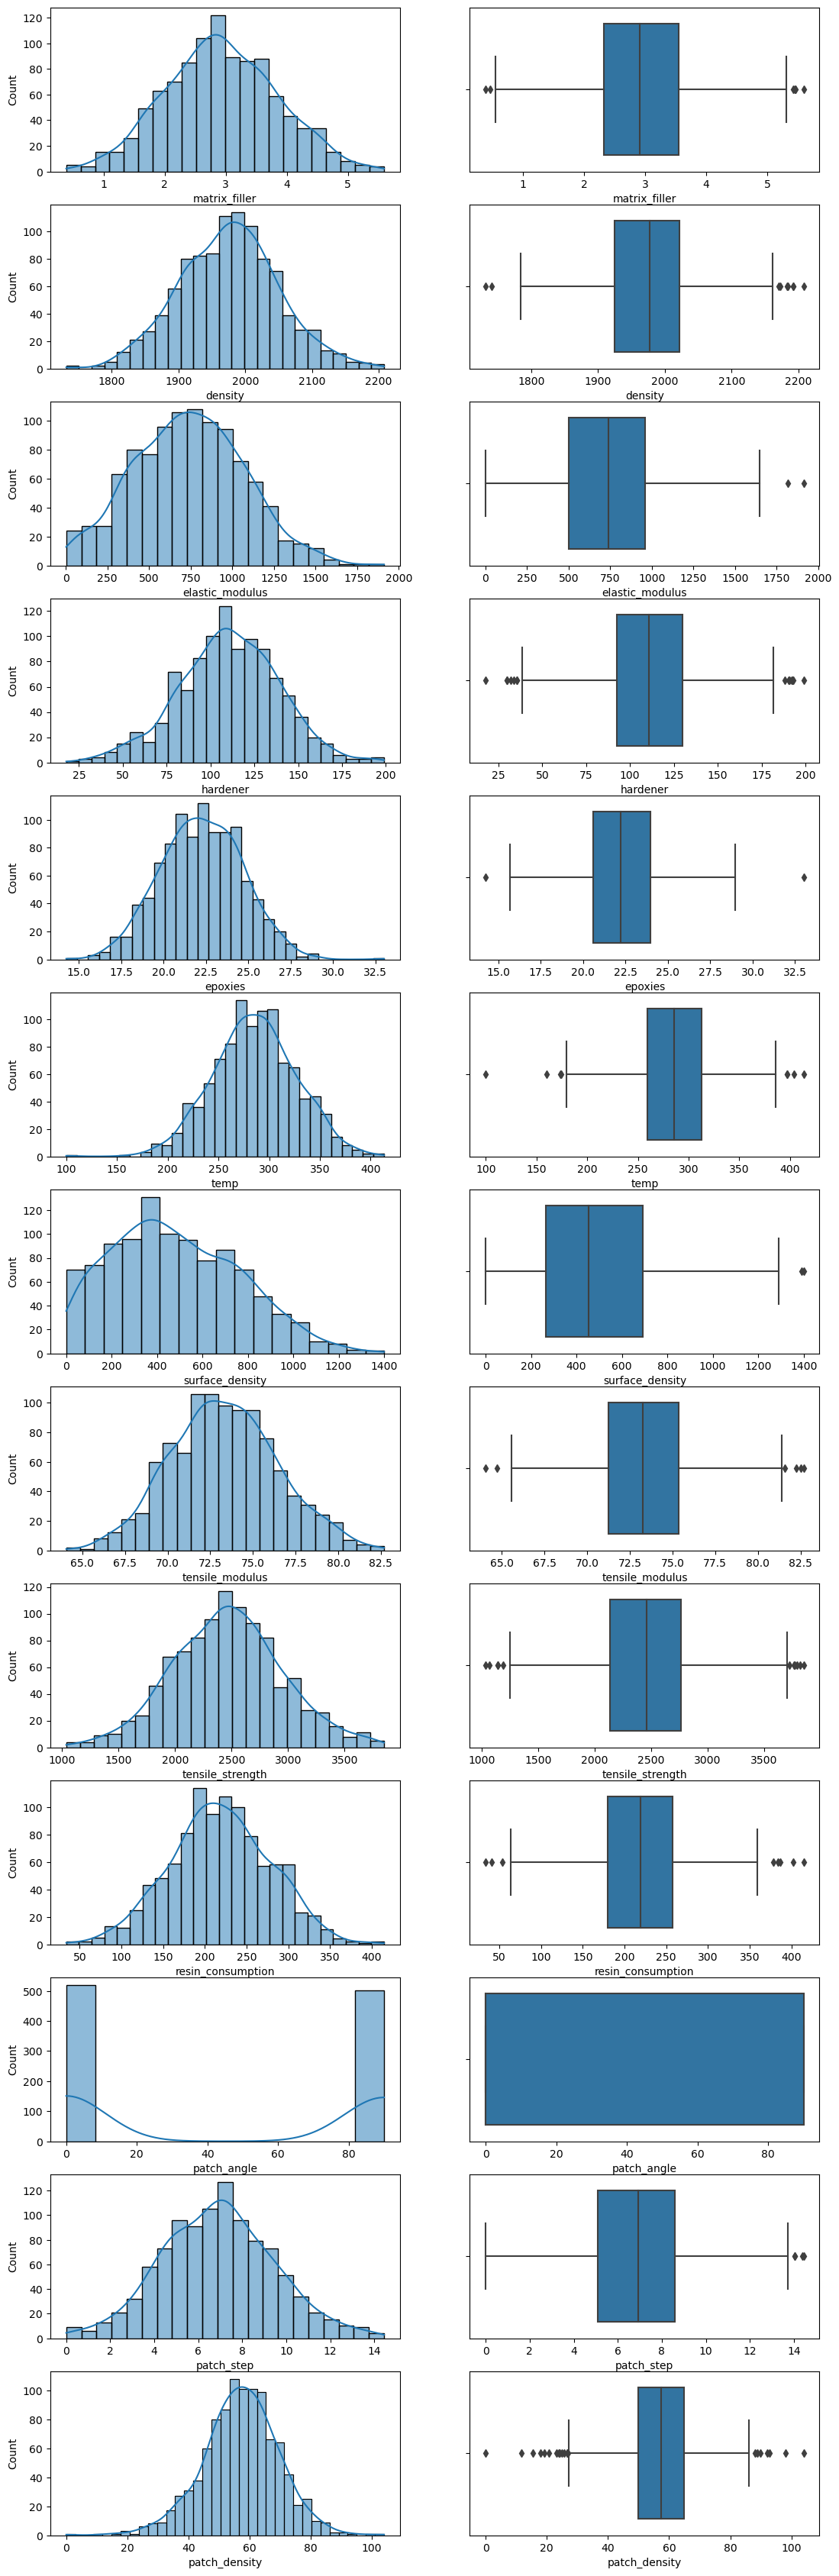

In [18]:
# Визуализируем "сырые" данные.
# Построим гистограммы распределения каждой переменной и "ящики с усами"

fig, axes = plt.subplots(13, 2, figsize=(13, 43))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Распределения нормальные по всем признакам кроме "Угол нашивки", который принимает два значения, и "Поверхностная плотность". Вызывает вопрос гистограмма "Поверхностная плотность", распределение смещено влево. Значения близкие к нулю имеют порядка 40 композитов базальтопластика. Насколько такой показатель возможен, при условивии, что по сути он показывает толщину материала?!Напимер, у бумаги поверхностная плотность около 80 гр/м.куб. Возможно некоторые виды базальтопластика могут быть тонкой пленкой. Без пояснений специалиста в данной производственной области, до конца разобраться в физическом смысле всех параметров мне не удалось. Принимаю данные в том виде, какими они были предаставлены.

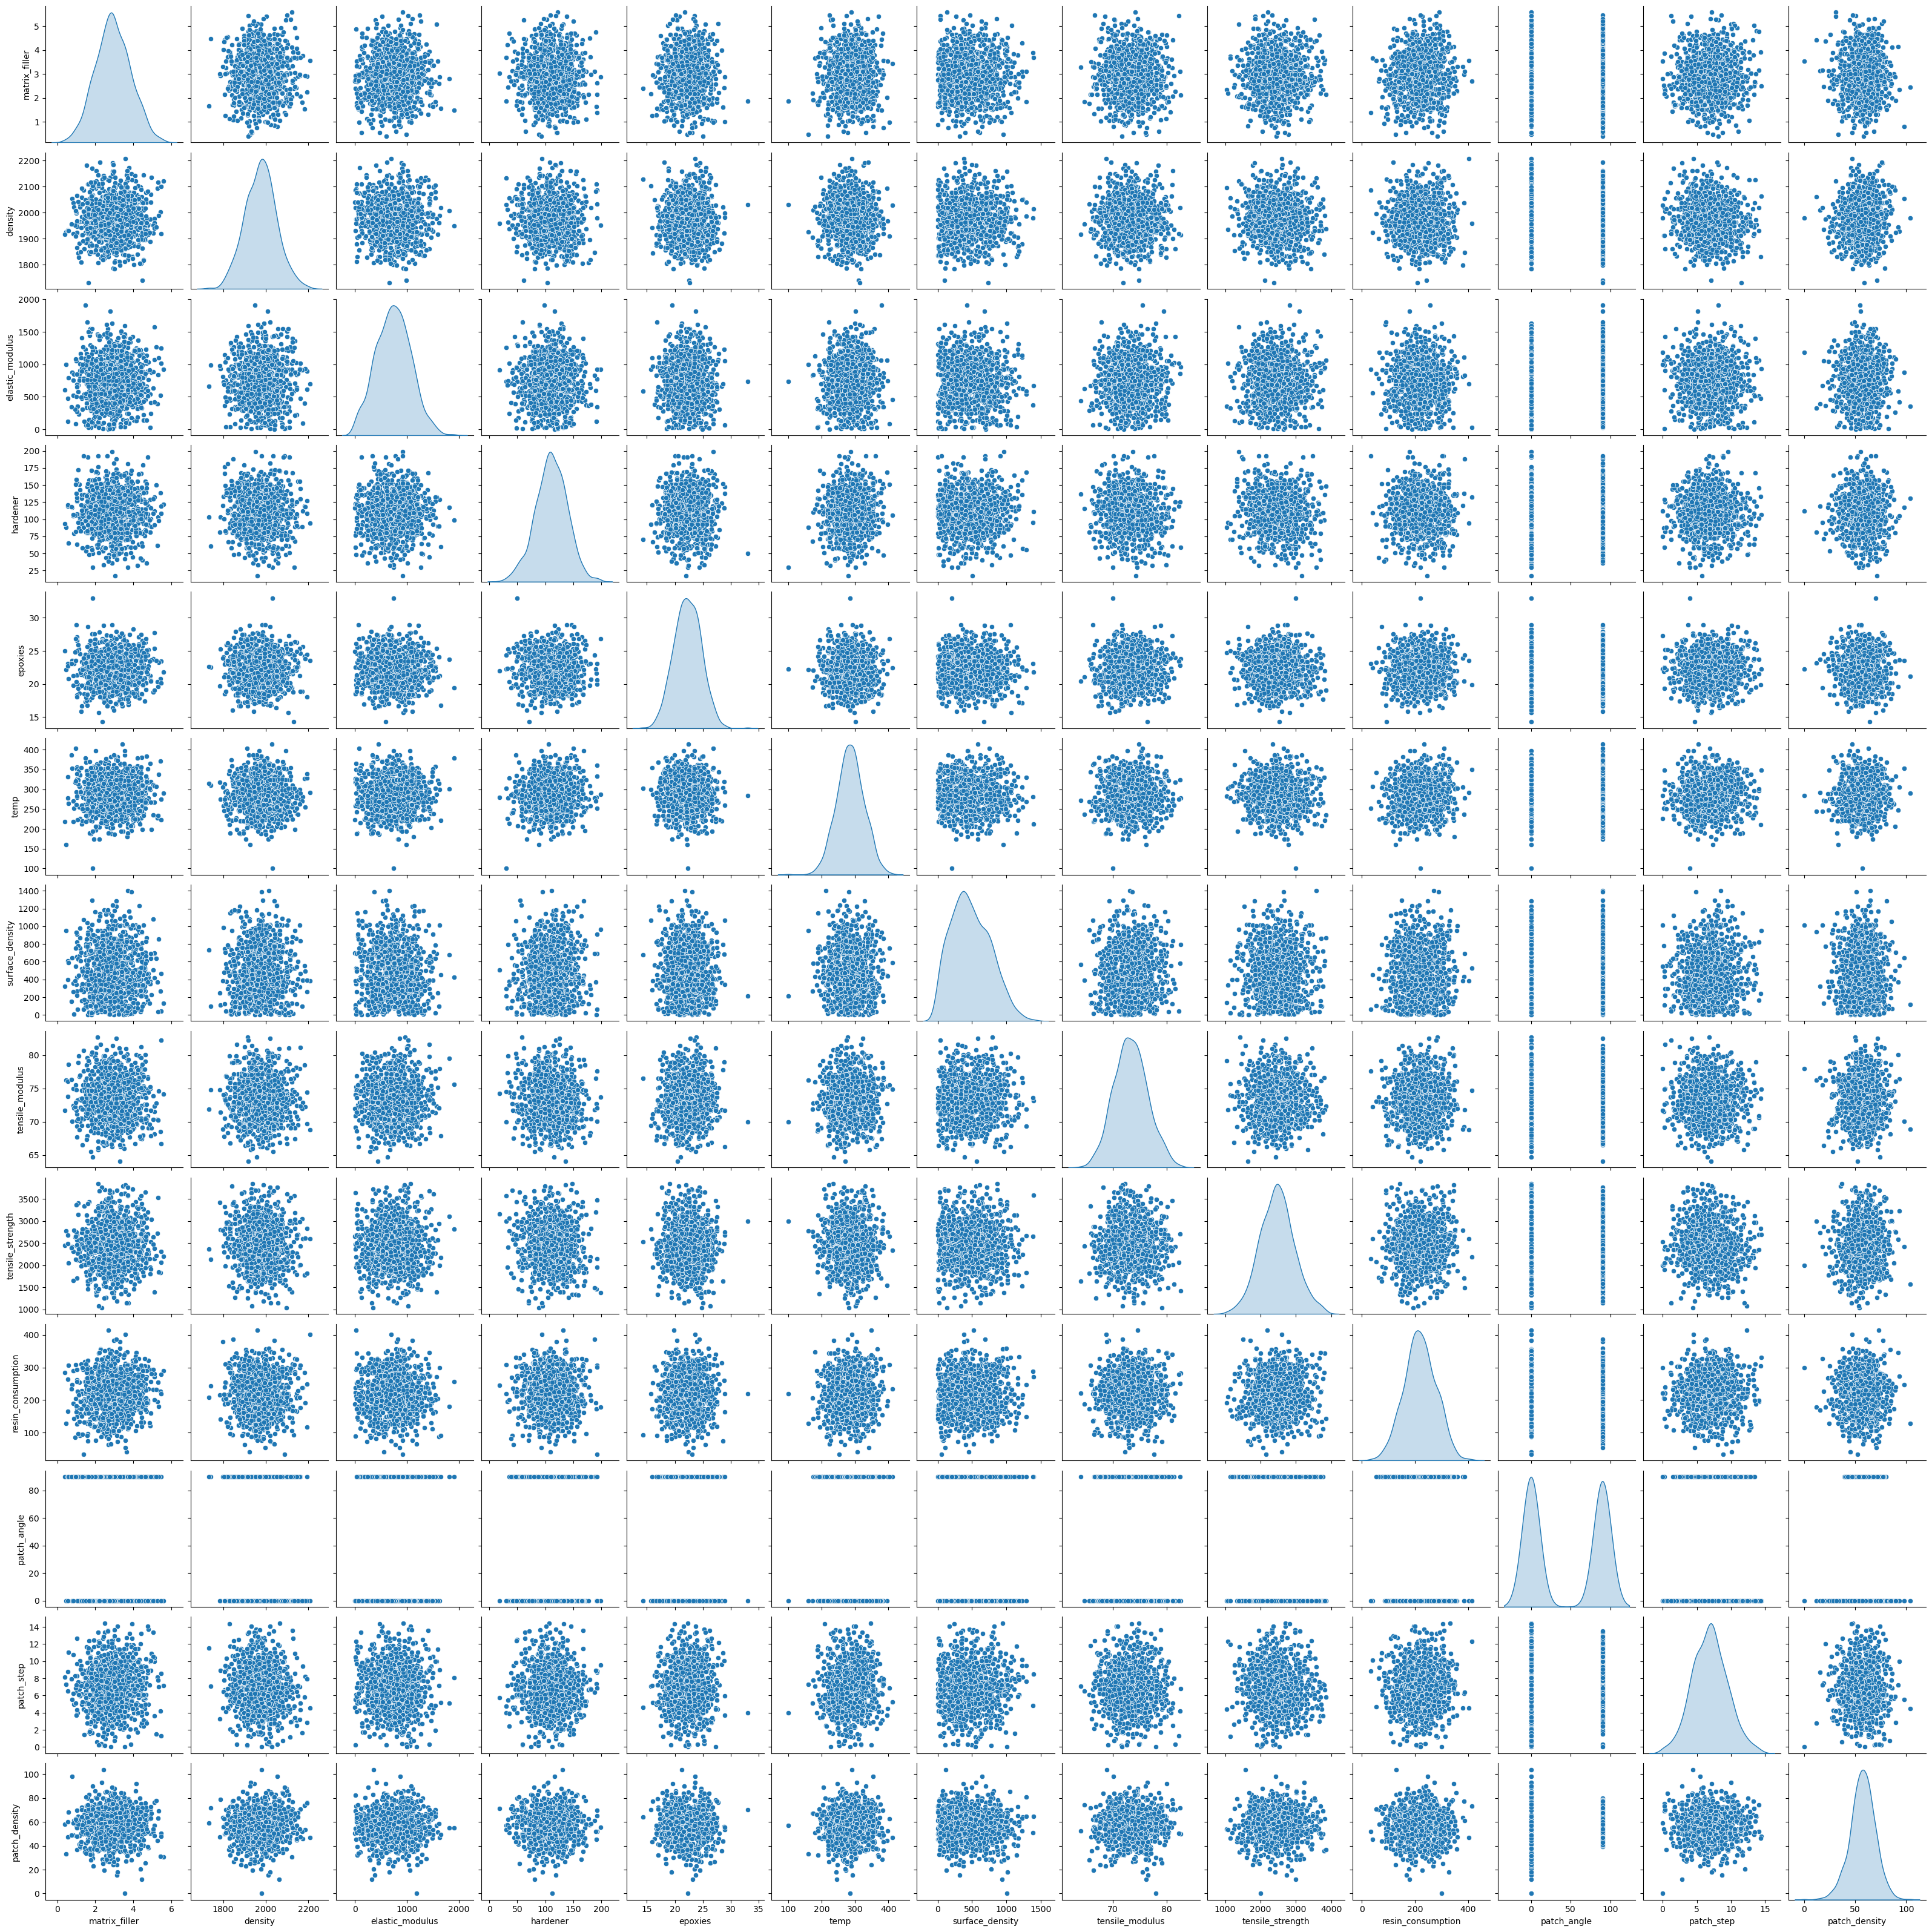

In [19]:
# Посмотрим попарные графики рассеивания значений признаков

sns.pairplot(df, diag_kind='kde')


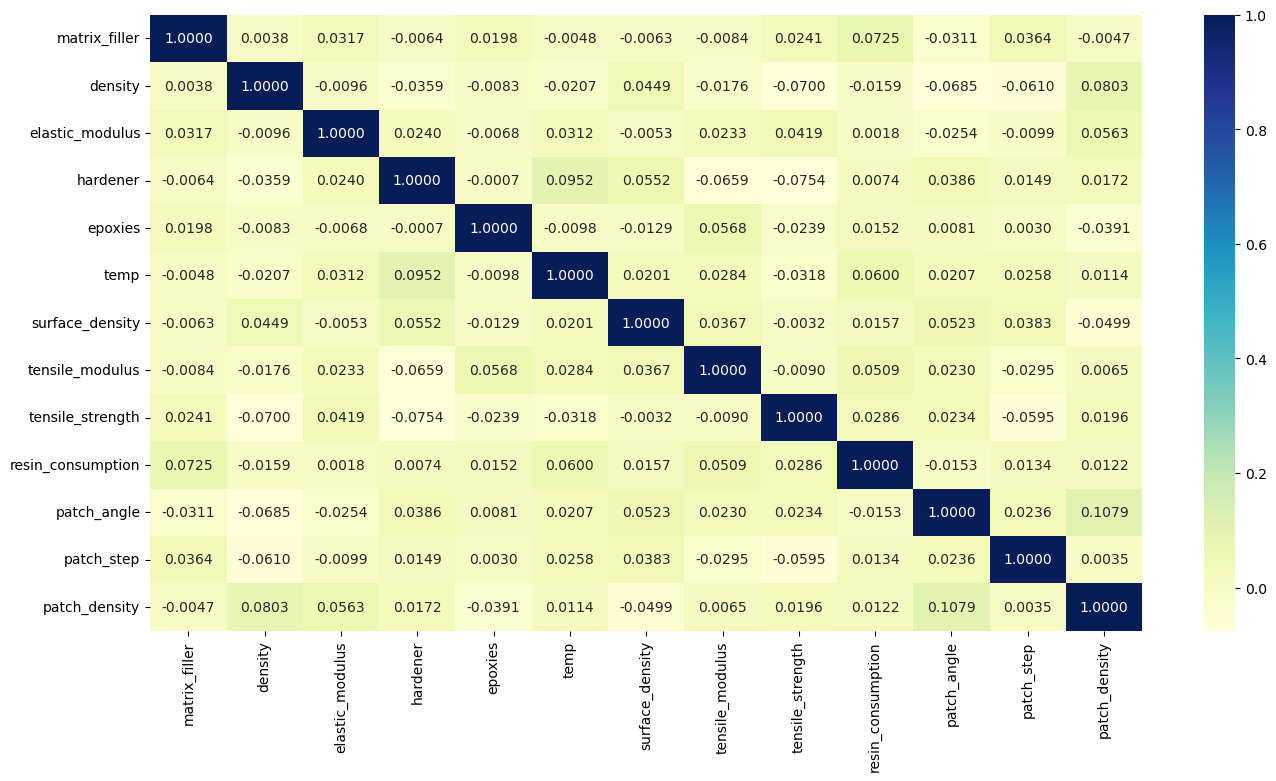

In [20]:
# Посмотрим линейную корреляцию между признаками на тепловой карте

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(16,8))
sns.heatmap(df.corr(), ax=ax, cmap='YlGnBu',annot=True, fmt='.4f')
plt.savefig('corr.png')

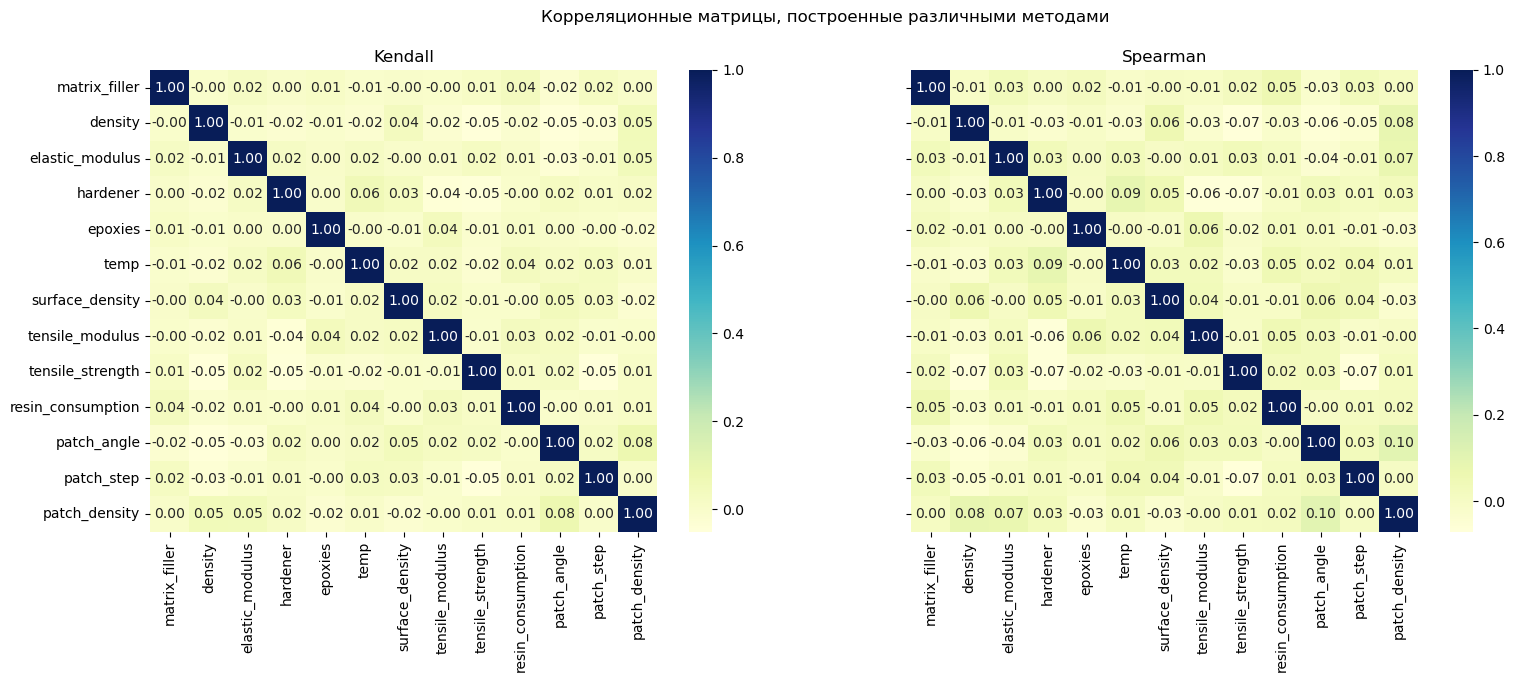

In [21]:
# Посмотрим не только корреляцию Пирсона, но и корреляцию Кендалла и Спирмена

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(df.corr(method='kendall'), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(df.corr(method='spearman'), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Kendall')
ax[1].title.set_text('Spearman')
plt.savefig('corr2.png')

In [22]:
# Дополнительно выведим значения корреляции целевых переменных с другими признаками

corr_matrix = df.corr()
corr_matrix["matrix_filler"].sort_values(ascending=False)

matrix_filler        1.000000
resin_consumption    0.072531
patch_step           0.036437
elastic_modulus      0.031700
tensile_strength     0.024148
epoxies              0.019766
density              0.003841
patch_density       -0.004652
temp                -0.004776
surface_density     -0.006272
hardener            -0.006445
tensile_modulus     -0.008411
patch_angle         -0.031073
Name: matrix_filler, dtype: float64

In [23]:
corr_matrix["tensile_modulus"].sort_values(ascending=False)

tensile_modulus      1.000000
epoxies              0.056828
resin_consumption    0.050938
surface_density      0.036702
temp                 0.028414
elastic_modulus      0.023267
patch_angle          0.023003
patch_density        0.006476
matrix_filler       -0.008411
tensile_strength    -0.009009
density             -0.017602
patch_step          -0.029468
hardener            -0.065929
Name: tensile_modulus, dtype: float64

In [24]:
corr_matrix["tensile_strength"].sort_values(ascending=False)

tensile_strength     1.000000
elastic_modulus      0.041868
resin_consumption    0.028602
matrix_filler        0.024148
patch_angle          0.023398
patch_density        0.019604
surface_density     -0.003210
tensile_modulus     -0.009009
epoxies             -0.023899
temp                -0.031763
patch_step          -0.059547
density             -0.069981
hardener            -0.075375
Name: tensile_strength, dtype: float64

Линейная корреляция между целевыми и входными переменными очень слабая

Попробуем возвести в квадрат, куб, извлечь корень, логарифмировать. Возможно появятся параметры с большей корреляцией

In [25]:
# Возведем в квадрат все значения

data_1=df.copy()
for i in data_1.columns:
    data_1[i]=data_1[i].apply(lambda x: x**2)
data_1.corr()

matrix_filler   density  elastic_modulus  hardener  \
matrix_filler           1.000000  0.006134         0.011930 -0.003395   
density                 0.006134  1.000000         0.012156 -0.029817   
elastic_modulus         0.011930  0.012156         1.000000  0.004706   
hardener               -0.003395 -0.029817         0.004706  1.000000   
epoxies                 0.022780 -0.008558        -0.005763  0.006501   
temp                   -0.004161 -0.019539         0.041111  0.087583   
surface_density        -0.010232  0.035202        -0.008541  0.055520   
tensile_modulus        -0.007308 -0.018055         0.029384 -0.068877   
tensile_strength        0.020110 -0.064938         0.033857 -0.064725   
resin_consumption       0.064198 -0.017201        -0.007677  0.017246   
patch_angle            -0.022289 -0.068714        -0.018697  0.036604   
patch_step              0.049140 -0.061654         0.015227 -0.006235   
patch_density          -0.009190  0.084238         0.049697  0.014554   

                    epoxies      temp  surface_density  tensile_modulus  \
matrix_filler      0.022780 -0.004161        -0.010232        -0.007308   
density           -0.008558 -0.019539         0.035202        -0.018055   
elastic_modulus   -0.005763  0.041111        -0.008541         0.029384   
hardener           0.006501  0.087583         0.055520        -0.068877   
epoxies            1.000000 -0.014202        -0.021905         0.053536   
temp              -0.014202  1.000000         0.005108         0.024511   
surface_density   -0.021905  0.005108         1.000000         0.034353   
tensile_modulus    0.053536  0.024511         0.034353         1.000000   
tensile_strength  -0.023107 -0.026459         0.000775        -0.010103   
resin_consumption  0.010930  0.060751         0.013596         0.054344   
patch_angle        0.007629  0.022141         0.040934         0.021983   
patch_step         0.017429  0.018037         0.034734        -0.024586   
patch_density     -0.033151  0.007198        -0.053385         0.010381   

                   tensile_strength  resin_consumption  patch_angle  \
matrix_filler              0.020110           0.064198    -0.022289   
density                   -0.064938          -0.017201    -0.068714   
elastic_modulus            0.033857          -0.007677    -0.018697   
hardener                  -0.064725           0.017246     0.036604   
epoxies                   -0.023107           0.010930     0.007629   
temp                      -0.026459           0.060751     0.022141   
surface_density            0.000775           0.013596     0.040934   
tensile_modulus           -0.010103           0.054344     0.021983   
tensile_strength           1.000000           0.028887     0.020095   
resin_consumption          0.028887           1.000000    -0.016654   
patch_angle                0.020095          -0.016654     1.000000   
patch_step                -0.065050           0.029449    -0.008072   
patch_density              0.010243           0.013558     0.049470   

                   patch_step  patch_density  
matrix_filler        0.049140      -0.009190  
density             -0.061654       0.084238  
elastic_modulus      0.015227       0.049697  
hardener            -0.006235       0.014554  
epoxies              0.017429      -0.033151  
temp                 0.018037       0.007198  
surface_density      0.034734      -0.053385  
tensile_modulus     -0.024586       0.010381  
tensile_strength    -0.065050       0.010243  
resin_consumption    0.029449       0.013558  
patch_angle         -0.008072       0.049470  
patch_step           1.000000      -0.000231  
patch_density       -0.000231       1.000000

In [26]:
# Возведем в куб все значения

data_2=df.copy()
for i in data_2.columns:
    data_2[i]=data_2[i].apply(lambda x: x**3)
data_2.corr()

matrix_filler   density  elastic_modulus  hardener  \
matrix_filler           1.000000  0.011781        -0.000536 -0.003060   
density                 0.011781  1.000000         0.024772 -0.023502   
elastic_modulus        -0.000536  0.024772         1.000000 -0.013834   
hardener               -0.003060 -0.023502        -0.013834  1.000000   
epoxies                 0.023988 -0.008740        -0.007076  0.012883   
temp                   -0.000248 -0.018234         0.046853  0.080532   
surface_density        -0.011137  0.024537        -0.009742  0.052468   
tensile_modulus        -0.006870 -0.018414         0.035199 -0.069739   
tensile_strength        0.013814 -0.058992         0.029272 -0.049935   
resin_consumption       0.053440 -0.015880        -0.016503  0.029752   
patch_angle            -0.016066 -0.068935        -0.005809  0.035491   
patch_step              0.056417 -0.059496         0.027433 -0.021552   
patch_density          -0.014740  0.085007         0.031668  0.008328   

                    epoxies      temp  surface_density  tensile_modulus  \
matrix_filler      0.023988 -0.000248        -0.011137        -0.006870   
density           -0.008740 -0.018234         0.024537        -0.018414   
elastic_modulus   -0.007076  0.046853        -0.009742         0.035199   
hardener           0.012883  0.080532         0.052468        -0.069739   
epoxies            1.000000 -0.018425        -0.025365         0.049576   
temp              -0.018425  1.000000        -0.007117         0.021010   
surface_density   -0.025365 -0.007117         1.000000         0.030409   
tensile_modulus    0.049576  0.021010         0.030409         1.000000   
tensile_strength  -0.023544 -0.022619         0.006122        -0.011666   
resin_consumption  0.006744  0.060919         0.019469         0.053760   
patch_angle        0.007133  0.023624         0.034079         0.020933   
patch_step         0.026972  0.009073         0.024259        -0.019937   
patch_density     -0.027410  0.004415        -0.048508         0.011273   

                   tensile_strength  resin_consumption  patch_angle  \
matrix_filler              0.013814           0.053440    -0.016066   
density                   -0.058992          -0.015880    -0.068935   
elastic_modulus            0.029272          -0.016503    -0.005809   
hardener                  -0.049935           0.029752     0.035491   
epoxies                   -0.023544           0.006744     0.007133   
temp                      -0.022619           0.060919     0.023624   
surface_density            0.006122           0.019469     0.034079   
tensile_modulus           -0.011666           0.053760     0.020933   
tensile_strength           1.000000           0.031791     0.016486   
resin_consumption          0.031791           1.000000    -0.020270   
patch_angle                0.016486          -0.020270     1.000000   
patch_step                -0.060200           0.039390    -0.030293   
patch_density              0.002842           0.014726    -0.003511   

                   patch_step  patch_density  
matrix_filler        0.056417      -0.014740  
density             -0.059496       0.085007  
elastic_modulus      0.027433       0.031668  
hardener            -0.021552       0.008328  
epoxies              0.026972      -0.027410  
temp                 0.009073       0.004415  
surface_density      0.024259      -0.048508  
tensile_modulus     -0.019937       0.011273  
tensile_strength    -0.060200       0.002842  
resin_consumption    0.039390       0.014726  
patch_angle         -0.030293      -0.003511  
patch_step           1.000000       0.000220  
patch_density        0.000220       1.000000

In [27]:
# Возьмем корень из всех значений

data_3=df.copy()
for i in data_3.columns:
    data_3[i]=data_3[i].apply(lambda x: x**(1/2))
data_3.corr()

matrix_filler   density  elastic_modulus  hardener  \
matrix_filler           1.000000  0.005003         0.043625 -0.009085   
density                 0.005003  1.000000        -0.024519 -0.038932   
elastic_modulus         0.043625 -0.024519         1.000000  0.032721   
hardener               -0.009085 -0.038932         0.032721  1.000000   
epoxies                 0.017243 -0.008125        -0.007289 -0.004459   
temp                   -0.001859 -0.021228         0.023578  0.100147   
surface_density        -0.003152  0.045249         0.004632  0.051698   
tensile_modulus        -0.009392 -0.017342         0.021666 -0.063858   
tensile_strength        0.023664 -0.071907         0.042446 -0.078163   
resin_consumption       0.075404 -0.014701         0.004024  0.004614   
patch_angle            -0.036410 -0.068348        -0.021115  0.040454   
patch_step              0.026414 -0.057993        -0.024549  0.028094   
patch_density          -0.005174  0.074734         0.046608  0.015574   

                    epoxies      temp  surface_density  tensile_modulus  \
matrix_filler      0.017243 -0.001859        -0.003152        -0.009392   
density           -0.008125 -0.021228         0.045249        -0.017342   
elastic_modulus   -0.007289  0.023578         0.004632         0.021666   
hardener          -0.004459  0.100147         0.051698        -0.063858   
epoxies            1.000000 -0.007655        -0.003075         0.058224   
temp              -0.007655  1.000000         0.026516         0.030530   
surface_density   -0.003075  0.026516         1.000000         0.038169   
tensile_modulus    0.058224  0.030530         0.038169         1.000000   
tensile_strength  -0.024878 -0.034977         0.000792        -0.008696   
resin_consumption  0.016923  0.058910         0.024014         0.047066   
patch_angle        0.008268  0.020108         0.057665         0.023501   
patch_step        -0.007279  0.028040         0.030990        -0.032172   
patch_density     -0.041242  0.013649        -0.045584        -0.000483   

                   tensile_strength  resin_consumption  patch_angle  \
matrix_filler              0.023664           0.075404    -0.036410   
density                   -0.071907          -0.014701    -0.068348   
elastic_modulus            0.042446           0.004024    -0.021115   
hardener                  -0.078163           0.004614     0.040454   
epoxies                   -0.024878           0.016923     0.008268   
temp                      -0.034977           0.058910     0.020108   
surface_density            0.000792           0.024014     0.057665   
tensile_modulus           -0.008696           0.047066     0.023501   
tensile_strength           1.000000           0.029670     0.024836   
resin_consumption          0.029670           1.000000    -0.015575   
patch_angle                0.024836          -0.015575     1.000000   
patch_step                -0.045938           0.002206     0.043588   
patch_density              0.025700           0.007653     0.136410   

                   patch_step  patch_density  
matrix_filler        0.026414      -0.005174  
density             -0.057993       0.074734  
elastic_modulus     -0.024549       0.046608  
hardener             0.028094       0.015574  
epoxies             -0.007279      -0.041242  
temp                 0.028040       0.013649  
surface_density      0.030990      -0.045584  
tensile_modulus     -0.032172      -0.000483  
tensile_strength    -0.045938       0.025700  
resin_consumption    0.002206       0.007653  
patch_angle          0.043588       0.136410  
patch_step           1.000000       0.027610  
patch_density        0.027610       1.000000

In [28]:
# Логарифмируем

data_4=df.copy()
for i in data_4.columns:
    data_4[i]=data_4[i].apply(lambda x: np.exp(x))

data_4.corr()

matrix_filler  density  elastic_modulus  hardener  \
matrix_filler           1.000000      NaN              NaN -0.010774   
density                      NaN      NaN              NaN       NaN   
elastic_modulus              NaN      NaN              NaN       NaN   
hardener               -0.010774      NaN              NaN  0.000000   
epoxies                -0.022451      NaN              NaN  0.000804   
temp                    0.000000      NaN              NaN -0.000000   
surface_density              NaN      NaN              NaN       NaN   
tensile_modulus         0.060120      NaN              NaN -0.004217   
tensile_strength             NaN      NaN              NaN       NaN   
resin_consumption      -0.000000      NaN              NaN -0.000000   
patch_angle            -0.011296      NaN              NaN -0.030856   
patch_step              0.060581      NaN              NaN -0.002360   
patch_density          -0.017242      NaN              NaN -0.000987   

                    epoxies  temp  surface_density  tensile_modulus  \
matrix_filler     -0.022451   0.0              NaN         0.060120   
density                 NaN   NaN              NaN              NaN   
elastic_modulus         NaN   NaN              NaN              NaN   
hardener           0.000804  -0.0              NaN        -0.004217   
epoxies            1.000000  -0.0              NaN        -0.004311   
temp              -0.000000   NaN              NaN        -0.000000   
surface_density         NaN   NaN              NaN              NaN   
tensile_modulus   -0.004311  -0.0              NaN         1.000000   
tensile_strength        NaN   NaN              NaN              NaN   
resin_consumption -0.000000   NaN              NaN        -0.000000   
patch_angle       -0.029720   0.0              NaN        -0.017007   
patch_step        -0.005902  -0.0              NaN        -0.018734   
patch_density     -0.001238  -0.0              NaN        -0.004286   

                   tensile_strength  resin_consumption  patch_angle  \
matrix_filler                   NaN               -0.0    -0.011296   
density                         NaN                NaN          NaN   
elastic_modulus                 NaN                NaN          NaN   
hardener                        NaN               -0.0    -0.030856   
epoxies                         NaN               -0.0    -0.029720   
temp                            NaN                NaN     0.000000   
surface_density                 NaN                NaN          NaN   
tensile_modulus                 NaN               -0.0    -0.017007   
tensile_strength                NaN                NaN          NaN   
resin_consumption               NaN                NaN    -0.000000   
patch_angle                     NaN               -0.0     1.000000   
patch_step                      NaN                0.0    -0.075556   
patch_density                   NaN               -0.0    -0.030860   

                   patch_step  patch_density  
matrix_filler        0.060581      -0.017242  
density                   NaN            NaN  
elastic_modulus           NaN            NaN  
hardener            -0.002360      -0.000987  
epoxies             -0.005902      -0.001238  
temp                -0.000000      -0.000000  
surface_density           NaN            NaN  
tensile_modulus     -0.018734      -0.004286  
tensile_strength          NaN            NaN  
resin_consumption    0.000000      -0.000000  
patch_angle         -0.075556      -0.030860  
patch_step           1.000000      -0.006031  
patch_density       -0.006031       1.000000

In [29]:
# Корреляция осталась такой же низкой

Попробуем найти новые фичи, которые могут дать лучшую, чем входные параметры, корреляцию с целевыми переменными. Буду использовать метод главных компонент PCA

In [30]:
# Нормализуем данные с помощью MinMaxScaler

data_pca = df.copy()
minmax_scaler = MinMaxScaler()
data_pca_norm = minmax_scaler.fit_transform(data_pca)
data_pca_norm = pd.DataFrame(data = data_pca_norm , columns = ['matrix_filler', 'density', 'elastic_modulus','hardener','epoxies',
                                                'temp','surface_density','tensile_modulus','tensile_strength',
                                                'resin_consumption','patch_angle', 'patch_step','patch_density']
                      )
data_pca_norm.describe().T

count      mean       std  min       25%       50%  \
matrix_filler      1023.0  0.488427  0.175541  0.0  0.370696  0.483912   
density            1023.0  0.512533  0.154890  0.0  0.404175  0.516497   
elastic_modulus    1023.0  0.386301  0.172978  0.0  0.260652  0.386165   
hardener           1023.0  0.512273  0.156147  0.0  0.412240  0.512240   
epoxies            1023.0  0.426215  0.128370  0.0  0.338919  0.425487   
temp               1023.0  0.593354  0.130695  0.0  0.507756  0.593401   
surface_density    1023.0  0.344638  0.201092  0.0  0.190296  0.322574   
tensile_modulus    1023.0  0.497880  0.167435  0.0  0.386030  0.494672   
tensile_strength   1023.0  0.508634  0.172724  0.0  0.390881  0.506003   
resin_consumption  1023.0  0.484838  0.156875  0.0  0.382955  0.486875   
patch_angle        1023.0  0.491691  0.500175  0.0  0.000000  0.000000   
patch_step         1023.0  0.477768  0.177519  0.0  0.351790  0.478940   
patch_density      1023.0  0.549616  0.118772  0.0  0.478890  0.551423   

                        75%  max  
matrix_filler      0.608045  1.0  
density            0.608413  1.0  
elastic_modulus    0.502528  1.0  
hardener           0.618003  1.0  
epoxies            0.517842  1.0  
temp               0.679924  1.0  
surface_density    0.495105  1.0  
tensile_modulus    0.606751  1.0  
tensile_strength   0.615432  1.0  
resin_consumption  0.587411  1.0  
patch_angle        1.000000  1.0  
patch_step         0.594597  1.0  
patch_density      0.624537  1.0

Поиск новых фич для МАТРИЦА_СООТНОШЕНИЕ

In [31]:
# Смотрим корреляцию с матрицей наполнителем и отбираем признаки

data_pca_norm.corrwith(data_pca_norm.matrix_filler).sort_values()

patch_angle         -0.031073
tensile_modulus     -0.008411
hardener            -0.006445
surface_density     -0.006272
temp                -0.004776
patch_density       -0.004652
density              0.003841
epoxies              0.019766
tensile_strength     0.024148
elastic_modulus      0.031700
patch_step           0.036437
resin_consumption    0.072531
matrix_filler        1.000000
dtype: float64

In [32]:
#Выбираю признаки с наибольшей корреляцией с целевой переменной матрица-соотношение

features = ['resin_consumption',
            'elastic_modulus',
            'tensile_strength',
            'epoxies'
]

# Смотрим "вклад " каждой составляющей нового признака в корреляцию с целевой переменной

print("Correlation with matrix_filler:\n")
print(data_pca_norm[features].corrwith(data_pca_norm.matrix_filler))

Correlation with matrix_filler:

resin_consumption    0.072531
elastic_modulus      0.031700
tensile_strength     0.024148
epoxies              0.019766
dtype: float64


In [33]:
X = data_pca_norm.copy()
y = X.pop("matrix_filler")
X = X.loc[:, features] #взяли только наши фичи

pca = PCA() #в скобках пусто, т.к. размер уменьшать не надо
X_pca = pca.fit_transform(X) #подаем данные

# Переводим результат в Pandas Dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])] 
X_pca = pd.DataFrame(X_pca, columns=component_names) 
# В loading записываем "смысловую нагрузку" компонент - коэф на которые pca умножает данные
loadings = pd.DataFrame( 
    pca.components_.T,
    columns=component_names,
    index=X.columns, 
    )

print(loadings)

                        PC1       PC2       PC3       PC4
resin_consumption  0.087060 -0.121088  0.987954 -0.041286
elastic_modulus    0.701524  0.712139  0.025778  0.007521
tensile_strength   0.706635 -0.691278 -0.145274  0.041191
epoxies           -0.030842  0.018151  0.046660  0.998270


Первая компонента обычно имеет самы большой вес, т.е. зависимость большей части данных объясняется ею. Далее по убыванию

In [34]:
# Добавим новые фичи в исходный датафрейм и посмотрим корреляцию с целевой переменной.
# Выбрала добавить первую компоненту и дополнительно сделала признак из трех составляющих первой компоненты с
# положительными значениями. Остальные компоненты не впечатлили, но для эксперимента добавлю фичу из pc2 с отрицательными
# значениями

X_matrix = data_pca_norm.join(X_pca.PC1)
X_matrix['from_pc1'] = X.resin_consumption + X.elastic_modulus + X.tensile_strength    #новая фича из pc1 
X_matrix['from_pc2'] = X.resin_consumption  + X.tensile_strength      #новая фича из pc2

X_matrix.head()

matrix_filler   density  elastic_modulus  hardener   epoxies      temp  \
0       0.282131  0.626533         0.385679  0.067654  0.427467  0.000000   
1       0.282131  0.626533         0.385679  0.178021  0.506535  0.589311   
2       0.282131  0.626533         0.385679  0.177469  1.000000  0.589311   
3       0.282131  0.626533         0.385679  0.613972  0.373167  0.638420   
4       0.457857  0.626533         0.393150  0.519387  0.427467  0.589311   

   surface_density  tensile_modulus  tensile_strength  resin_consumption  \
0         0.149682         0.319194          0.698235           0.488979   
1         0.149682         0.319194          0.698235           0.488979   
2         0.149682         0.319194          0.698235           0.488979   
3         0.149682         0.319194          0.698235           0.488979   
4         0.149682         0.319194          0.698235           0.488979   

   patch_angle  patch_step  patch_density       PC1  from_pc1  from_pc2  
0          0.0    0.276998       0.548135  0.133864  1.572893  1.187213  
1          0.0    0.276998       0.576985  0.131426  1.572893  1.187213  
2          0.0    0.276998       0.673149  0.116206  1.572893  1.187213  
3          0.0    0.346248       0.451971  0.135539  1.572893  1.187213  
4          0.0    0.346248       0.548135  0.139106  1.580364  1.187213

Поиск новых фич для МАТРИЦА_СООТНОШЕНИЕ

In [35]:
X_matrix.corrwith(X_matrix.matrix_filler).sort_values()

patch_angle         -0.031073
tensile_modulus     -0.008411
hardener            -0.006445
surface_density     -0.006272
temp                -0.004776
patch_density       -0.004652
density              0.003841
epoxies              0.019766
tensile_strength     0.024148
elastic_modulus      0.031700
patch_step           0.036437
PC1                  0.043633
from_pc2             0.065711
from_pc1             0.070694
resin_consumption    0.072531
matrix_filler        1.000000
dtype: float64

Поиск новых фич для УПРУГОСТЬ ПРИ РАСТЯЖЕНИИ

In [36]:
# Смотрим корреляцию с целевой переменной модуль упругости при растяжении и отбираем признаки

data_pca_norm.corrwith(data_pca_norm.tensile_modulus).sort_values()

hardener            -0.065929
patch_step          -0.029468
density             -0.017602
tensile_strength    -0.009009
matrix_filler       -0.008411
patch_density        0.006476
patch_angle          0.023003
elastic_modulus      0.023267
temp                 0.028414
surface_density      0.036702
resin_consumption    0.050938
epoxies              0.056828
tensile_modulus      1.000000
dtype: float64

In [37]:
features = ['resin_consumption',
            'epoxies',
            'surface_density',
]

print("Correlation with tensile_modulus:\n")
print(data_pca_norm[features].corrwith(data_pca_norm.tensile_modulus))

Correlation with tensile_modulus:

resin_consumption    0.050938
epoxies              0.056828
surface_density      0.036702
dtype: float64


In [38]:
X = data_pca_norm.copy()
y = X.pop("tensile_modulus")
X = X.loc[:, features]

pca = PCA()
X_pca = pca.fit_transform(X)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])] #
X_pca = pd.DataFrame(X_pca, columns=component_names)
loadings = pd.DataFrame( 
    pca.components_.T,
    columns=component_names, 
    index=X.columns, 
)

print(loadings)

                        PC1       PC2       PC3
resin_consumption  0.030957  0.998785 -0.038345
epoxies           -0.013528  0.038779  0.999156
surface_density    0.999429 -0.030412  0.014712


В каждой компаненте смысловая нагрузка почти полностью приходится на одну составляющую, а значит, смысла в компоненте, как в новой фичи, нет, она будет дублировать сам основной параметр. В данном случае добавлять в датасет новый параметр не имеет смысла.

Поиск новых фич для ПЛОТНОСТЬ ПРИ РАСТЯЖЕНИИ

In [39]:
# Смотрим корреляцию с целевой переменной прочность при растяжении и отбираем признаки

data_pca_norm.corrwith(data_pca_norm.tensile_strength).sort_values()

hardener            -0.075375
density             -0.069981
patch_step          -0.059547
temp                -0.031763
epoxies             -0.023899
tensile_modulus     -0.009009
surface_density     -0.003210
patch_density        0.019604
patch_angle          0.023398
matrix_filler        0.024148
resin_consumption    0.028602
elastic_modulus      0.041868
tensile_strength     1.000000
dtype: float64

In [40]:
# Здесь возьмем параметры сотрицательной корреляцией

features = ['hardener',
            'density',
            'patch_step'
]

print("Correlation with tensile_modulus:\n")
print(data_pca_norm[features].corrwith(data_pca_norm.tensile_strength))

Correlation with tensile_modulus:

hardener     -0.075375
density      -0.069981
patch_step   -0.059547
dtype: float64


In [41]:
X = data_pca_norm.copy()
y = X.pop("tensile_strength") 
X = X.loc[:, features]

pca = PCA() 
X_pca = pca.fit_transform(X) 

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])] 
X_pca = pd.DataFrame(X_pca, columns=component_names) 
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=component_names, 
    index=X.columns, 
)

print(loadings)

                 PC1       PC2       PC3
hardener    0.078072 -0.839540 -0.537659
density    -0.214656  0.512500 -0.831424
patch_step  0.973564  0.180323 -0.140200


In [42]:
# PC1 мне показался не интересен, т.к. его значение определяет один параметр patch_step.
# Добавлю в датафрейм PC3 и отдельно сумму двух наиболее значимых составляющих

data_new = data_pca_norm.join(X_pca.PC3)
data_new['from_pc2'] = X.hardener + X.density      
data_new.head()

matrix_filler   density  elastic_modulus  hardener   epoxies      temp  \
0       0.282131  0.626533         0.385679  0.067654  0.427467  0.000000   
1       0.282131  0.626533         0.385679  0.178021  0.506535  0.589311   
2       0.282131  0.626533         0.385679  0.177469  1.000000  0.589311   
3       0.282131  0.626533         0.385679  0.613972  0.373167  0.638420   
4       0.457857  0.626533         0.393150  0.519387  0.427467  0.589311   

   surface_density  tensile_modulus  tensile_strength  resin_consumption  \
0         0.149682         0.319194          0.698235           0.488979   
1         0.149682         0.319194          0.698235           0.488979   
2         0.149682         0.319194          0.698235           0.488979   
3         0.149682         0.319194          0.698235           0.488979   
4         0.149682         0.319194          0.698235           0.488979   

   patch_angle  patch_step  patch_density       PC3  from_pc2  
0          0.0    0.276998       0.548135  0.172419  0.694187  
1          0.0    0.276998       0.576985  0.113079  0.804554  
2          0.0    0.276998       0.673149  0.113376  0.804003  
3          0.0    0.346248       0.451971 -0.131023  1.240506  
4          0.0    0.346248       0.548135 -0.080169  1.145921

In [43]:
data_new.corrwith(data_new.tensile_strength).sort_values()

from_pc2            -0.104694
hardener            -0.075375
density             -0.069981
patch_step          -0.059547
temp                -0.031763
epoxies             -0.023899
tensile_modulus     -0.009009
surface_density     -0.003210
patch_density        0.019604
patch_angle          0.023398
matrix_filler        0.024148
resin_consumption    0.028602
elastic_modulus      0.041868
PC3                  0.110571
tensile_strength     1.000000
dtype: float64

In [44]:
# Неплохой результат. Использую эти две новые фичи при создании модели для целевой переменной прочность при растяжении

Попробую сделать КЛАСТЕРИЗАЦИЮ, возможно в данных содержатся группы композитов, сильно отличающиеся друг от друга и вместе они не дают проследить взаимосвязь между параметрами

In [45]:
# Использую нормализованные данные
data_claster = data_pca_norm
data_claster.head()

matrix_filler   density  elastic_modulus  hardener   epoxies      temp  \
0       0.282131  0.626533         0.385679  0.067654  0.427467  0.000000   
1       0.282131  0.626533         0.385679  0.178021  0.506535  0.589311   
2       0.282131  0.626533         0.385679  0.177469  1.000000  0.589311   
3       0.282131  0.626533         0.385679  0.613972  0.373167  0.638420   
4       0.457857  0.626533         0.393150  0.519387  0.427467  0.589311   

   surface_density  tensile_modulus  tensile_strength  resin_consumption  \
0         0.149682         0.319194          0.698235           0.488979   
1         0.149682         0.319194          0.698235           0.488979   
2         0.149682         0.319194          0.698235           0.488979   
3         0.149682         0.319194          0.698235           0.488979   
4         0.149682         0.319194          0.698235           0.488979   

   patch_angle  patch_step  patch_density  
0          0.0    0.276998       0.548135  
1          0.0    0.276998       0.576985  
2          0.0    0.276998       0.673149  
3          0.0    0.346248       0.451971  
4          0.0    0.346248       0.548135

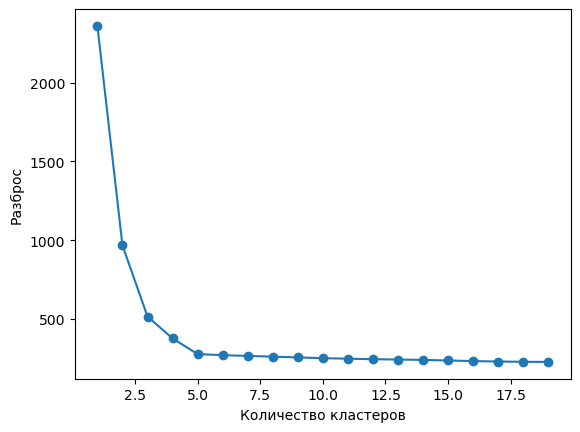

<Figure size 640x480 with 0 Axes>

In [218]:
# Определимся с количеством кластеров

distortions = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04)
    kmeans_prediction = kmeans.fit_predict(data_claster)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Разброс')
plt.show()
pt.savefig('jkdj.png')

In [47]:
# Попробую разбить данные на пять кластеров

In [48]:
kmeans = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04)
#алгаритм принимает на вход заданные параметры. 20 кластерjd, начало количества точек, количество итераций, внутренний параметр
kmeans_prediction = kmeans.fit_predict(data_claster)  #метод fit отвечает за обучение и подстройку параметров. предикт метод предсказывает

In [49]:
kmeans_prediction

array([0, 0, 0, ..., 1, 1, 1])

In [50]:
number_clast = pd.DataFrame(data = kmeans_prediction, columns = ['claster'])
data_claster = data_claster.join(number_clast)
data_claster

matrix_filler   density  elastic_modulus  hardener   epoxies      temp  \
0          0.282131  0.626533         0.385679  0.067654  0.427467  0.000000   
1          0.282131  0.626533         0.385679  0.178021  0.506535  0.589311   
2          0.282131  0.626533         0.385679  0.177469  1.000000  0.589311   
3          0.282131  0.626533         0.385679  0.613972  0.373167  0.638420   
4          0.457857  0.626533         0.393150  0.519387  0.427467  0.589311   
...             ...       ...              ...       ...       ...       ...   
1018       0.361750  0.462855         0.476884  0.382158  0.313057  0.717503   
1019       0.587163  0.668737         0.231678  0.707685  0.285131  0.492271   
1020       0.555750  0.505470         0.217065  0.512067  0.517605  0.473781   
1021       0.637396  0.703842         0.387114  0.682389  0.266309  0.561107   
1022       0.657131  0.333290         0.217317  0.614984  0.705242  0.641461   

      surface_density  tensile_modulus  tensile_strength  resin_consumption  \
0            0.149682         0.319194          0.698235           0.488979   
1            0.149682         0.319194          0.698235           0.488979   
2            0.149682         0.319194          0.698235           0.488979   
3            0.149682         0.319194          0.698235           0.488979   
4            0.149682         0.319194          0.698235           0.488979   
...               ...              ...               ...                ...   
1018         0.149109         0.485125          0.480312           0.239516   
1019         0.250230         0.475992          0.470745           0.220404   
1020         0.528643         0.573346          0.578340           0.532590   
1021         0.458108         0.536217          0.368070           0.428909   
1022         0.541942         0.550550          0.647135           0.422680   

      patch_angle  patch_step  patch_density  claster  
0             0.0    0.276998       0.548135        0  
1             0.0    0.276998       0.576985        0  
2             0.0    0.276998       0.673149        0  
3             0.0    0.346248       0.451971        0  
4             0.0    0.346248       0.548135        0  
...           ...         ...            ...      ...  
1018          1.0    0.628535       0.452161        2  
1019          1.0    0.731664       0.516890        2  
1020          1.0    0.288158       0.650355        1  
1021          1.0    0.437186       0.560262        1  
1022          1.0    0.420961       0.744642        1  

[1023 rows x 14 columns]

In [51]:
data_claster1 = data_claster.loc[(data_claster['claster'] == 0)]
data_claster2 = data_claster.loc[(data_claster['claster'] == 1)]
data_claster3 = data_claster.loc[(data_claster['claster'] == 2)]
data_claster4 = data_claster.loc[(data_claster['claster'] == 3)]
data_claster5 = data_claster.loc[(data_claster['claster'] == 4)]

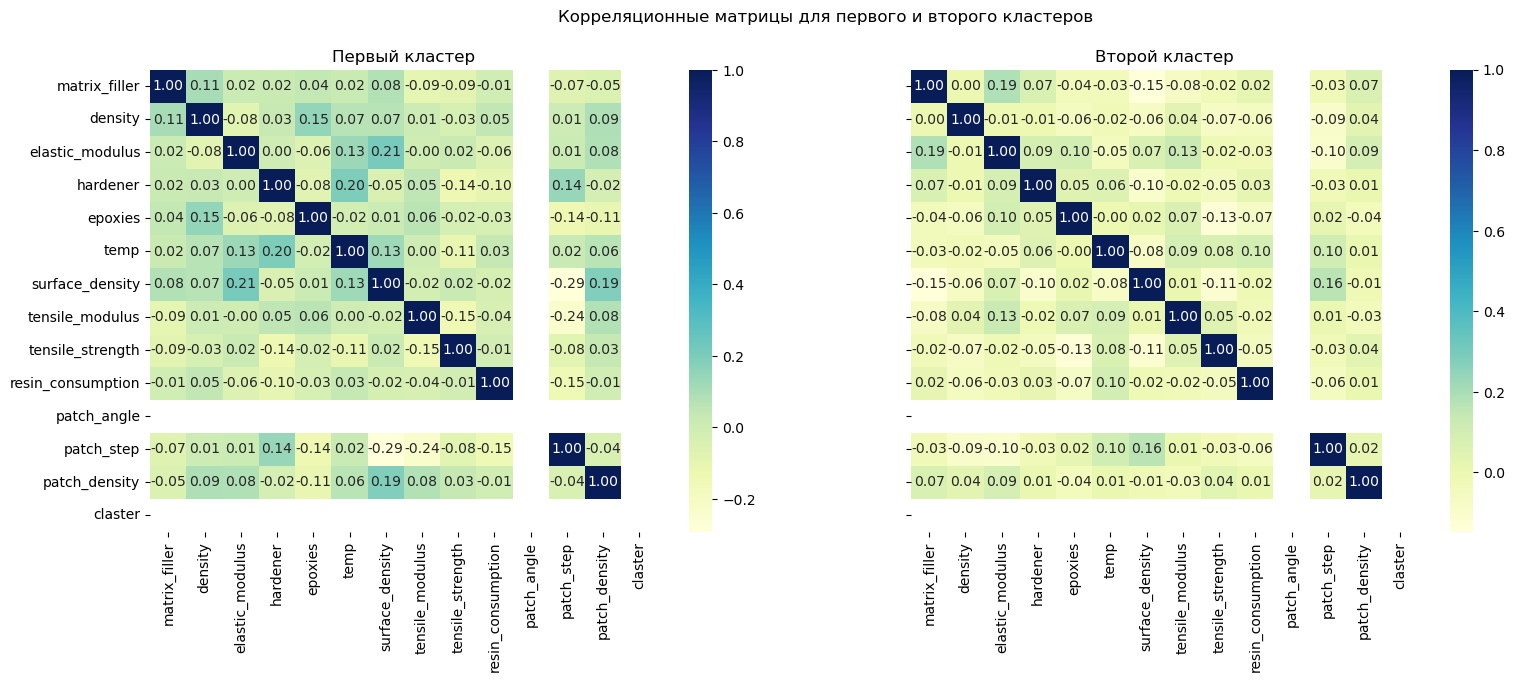

In [52]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster1.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster2.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы для первого и второго кластеров')
ax[0].title.set_text('Первый кластер')
ax[1].title.set_text('Второй кластер')

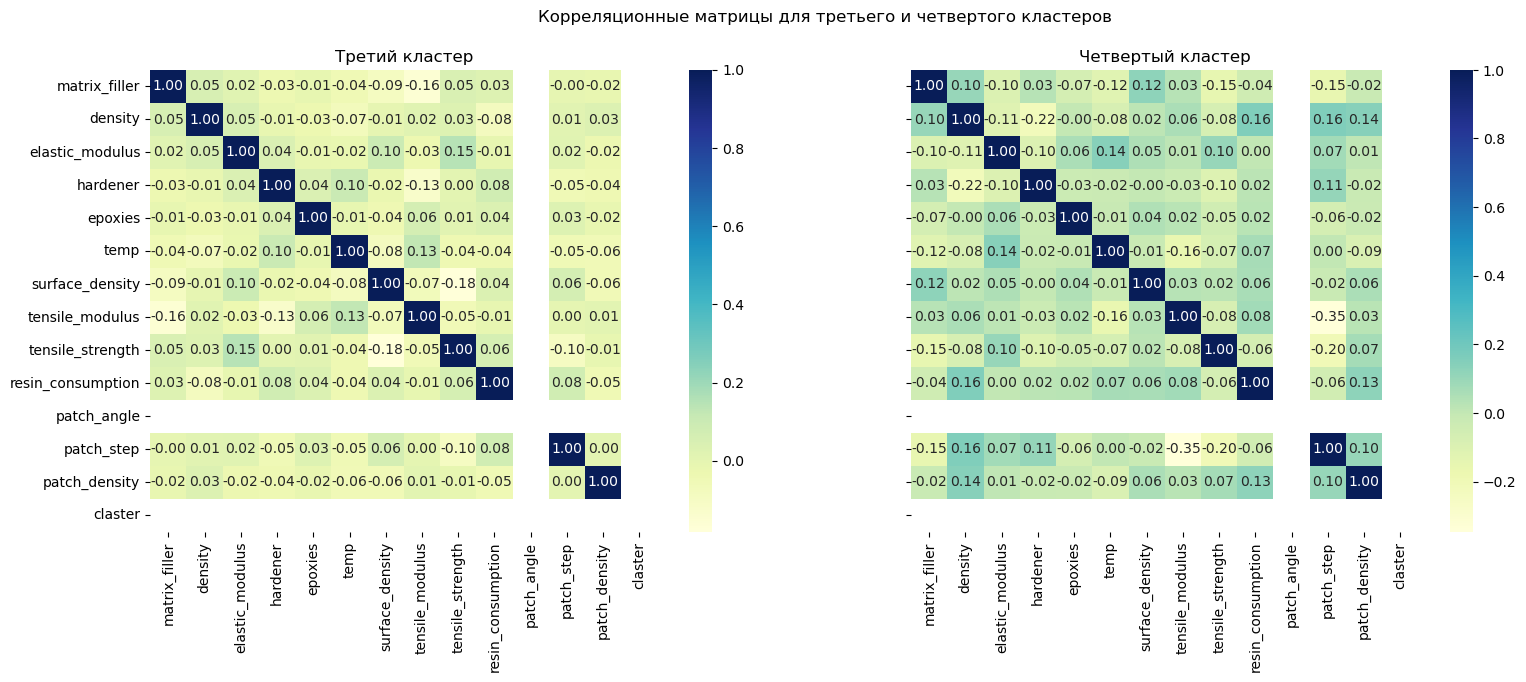

In [53]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(18,6))
sns.heatmap(data_claster3.corr(), ax=ax[0], cmap='YlGnBu', annot=True, fmt='.2f')
sns.heatmap(data_claster4.corr(), ax=ax[1], cmap='YlGnBu', annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы для третьего и четвертого кластеров')
ax[0].title.set_text('Третий кластер')
ax[1].title.set_text('Четвертый кластер')

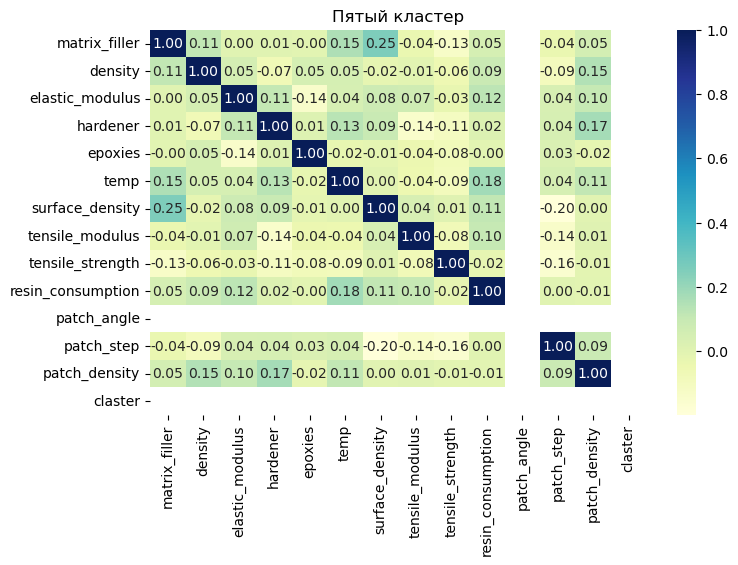

In [54]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(8,5))
sns.heatmap(data_claster5.corr(), ax=ax, cmap='YlGnBu', annot=True, fmt='.2f')
ax.title.set_text('Пятый кластер')

Я предполагала, что в выборке есть разные группы композитов, которые имеют определенные характеристики. Когда данные смешаны, закономерность в зависимостях не находится, а при выделении этих групп, должна была появиться тенденция к зависимостям между определенными параметрами. По тепловым картам видно, что корреляция внутри групп стала выше, но общей картины выявить не получилось. В разных группах разные параметры дали увеличение корреляции. Делаю вывод, что выделение 6 групп не дает нам понимания в зависимости между параметрами. Возможно нужно пробовать другое количество кластеров

ПРЕДОБРАБОТКА ДАННЫХ

Пропусков значений в данных нет.
По ящикам с усами и попарным графикам рассеивания видно, что в датасете есть выбросы. Необходимо избавиться от них, т.к. некоторые модели машинного обучения чувствительны к выбросам в данных.
При нормальном распределении рекомендуется использовать метод трех сигм. У нас есть параметр, у которого ненормальное распределение, поэтому было решено использовать метод квантилей.
В случае данных, которые получены в резельтате физических измерений, кажется логичным выбросы удалять, но я решила попробовать заменить их медианными значениями. Так мы не потеряем данные из небольшого по размеру датасета. Если буду успевать, то попробую вариант с удалением выбросов

In [160]:
df.columns
for i in df.columns:
    perc25=np.quantile(df[i],0.25)
    perc75=np.quantile(df[i],0.75)
    IQR=perc75-perc25
    df.loc[((perc75+1.5*IQR<df[i])|(perc25-1.5*IQR>df[i])),i]=np.median(df[i])
describe = df.describe().T
describe

count         mean         std          min          25%  \
matrix_filler      1023.0     2.925149    0.892296     0.547391     2.321061   
density            1023.0  1974.780371   70.843060  1784.482245  1924.535020   
elastic_modulus    1023.0   737.725703  326.453983     2.436909   500.047452   
hardener           1023.0   110.558141   26.661661    38.668500    92.883002   
epoxies            1023.0    22.241659    2.369521    15.695894    20.615227   
temp               1023.0   285.949096   39.355511   179.374391   259.372264   
surface_density    1023.0   480.887409  278.400280     0.603740   266.816645   
tensile_modulus    1023.0    73.310802    3.042662    65.553336    71.287231   
tensile_strength   1023.0  2465.702548  465.480040  1250.392802  2146.295983   
resin_consumption  1023.0   218.089920   57.681967    63.685698   179.932410   
patch_angle        1023.0    44.252199   45.015793     0.000000     0.000000   
patch_step         1023.0     6.870642    2.521972     0.000000     5.080033   
patch_density      1023.0    57.411230   11.142796    27.272928    50.277138   

                           50%          75%          max  
matrix_filler         2.906878     3.548775     5.314144  
density            1977.621657  2020.628746  2161.565216  
elastic_modulus     739.664328   957.386959  1649.415706  
hardener            110.564840   129.233303   181.828448  
epoxies              22.230744    23.961468    28.955094  
temp                285.896812   312.586724   386.067992  
surface_density     451.864365   691.775979  1291.340115  
tensile_modulus      73.268805    75.322176    81.417126  
tensile_strength   2459.524526  2755.823091  3705.672523  
resin_consumption   219.198882   256.760915   359.052220  
patch_angle           0.000000    90.000000    90.000000  
patch_step            6.916144     8.575956    13.732404  
patch_density        57.341920    64.588169    86.012427

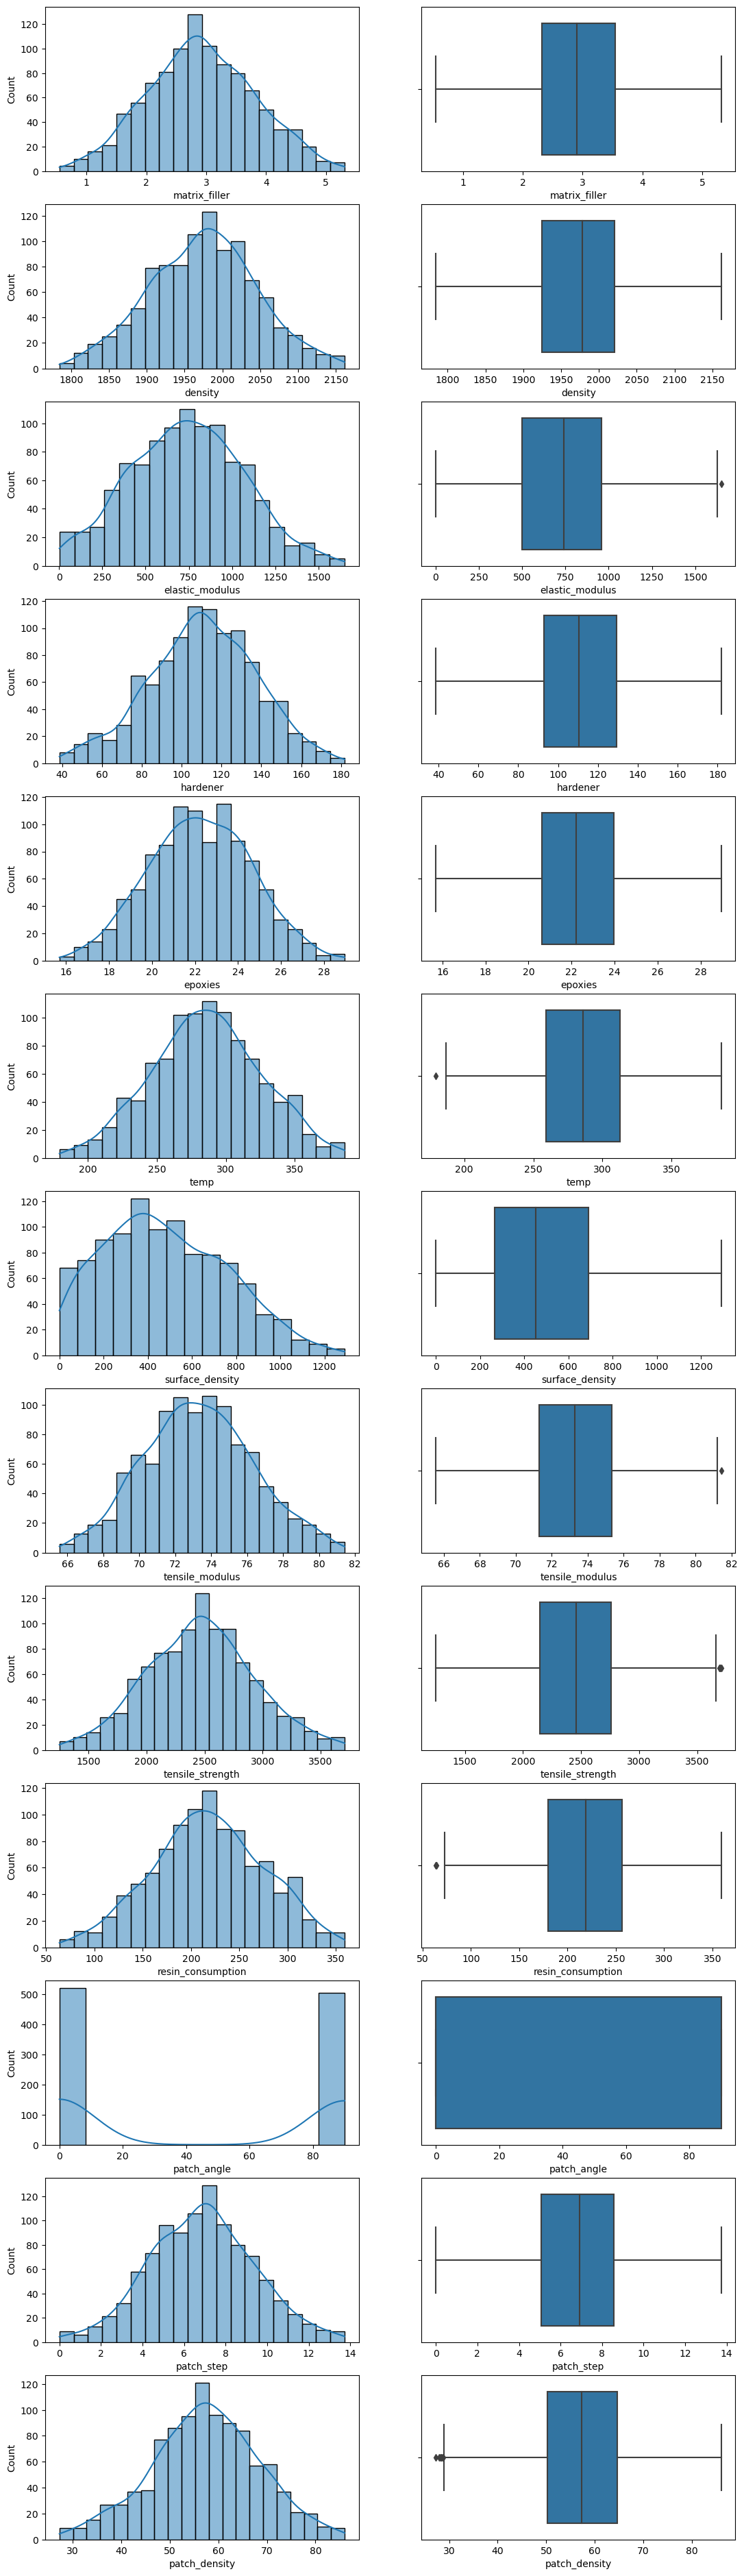

<Figure size 640x480 with 0 Axes>

In [217]:
# После замены значений в выбросах еще раз построим гистограммы и "ящики с усами"

fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()
plt.savefig('gist.jpg')

По боксплотам видно, что выбросы опять есть. Думаю, это связано с новым расчетом значений квантилей, после замены исходных значений

МАСШТАБИРОВАНИЕ

Проведу масштабирование исходной выборки. На консультации по ВКР преподаватель дал совет масштабировать всю выборку полностью, а после, при необходимости, применять демасштабирование. Сделаю два вариант. Один с помощью MinMaxScaler, второй с помощью StandardScaler

Масштабирование данных на основе Z-оценки x′=x−μ(x)/σ(x) где x - признак, μ(x)=mean(x) - среднее значение, σ(x)=std(x)
среднеквадратичное отклонение.
Особенности метода: Среднее значение приводится к 0. Среднеквадратичное отклонение приводится к 1. Форма исходного распределения сохраняется. Максимальные и минимальные значения могут варьироваться. Выбросы сохраняются. Метод реализован с использованием StandardScaler.

In [57]:
# Посмотрим названия столбцов датафрейма

df.columns

Index(['matrix_filler', 'density', 'elastic_modulus', 'hardener', 'epoxies',
       'temp', 'surface_density', 'tensile_modulus', 'tensile_strength',
       'resin_consumption', 'patch_angle', 'patch_step', 'patch_density'],
      dtype='object')

In [58]:
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(np.array(df))
df_std = pd.DataFrame(data = df_std, columns = ['matrix_filler', 'density', 'elastic_modulus','hardener','epoxies',
                                                'temp','surface_density','tensile_modulus','tensile_strength',
                                                'resin_consumption','patch_angle', 'patch_step','patch_density']
                     )
df_std.describe().T

count          mean       std       min       25%  \
matrix_filler      1023.0 -7.466603e-17  1.000489 -2.666067 -0.677335   
density            1023.0  4.167406e-16  1.000489 -2.687507 -0.709596   
elastic_modulus    1023.0  3.993764e-17  1.000489 -2.253452 -0.728417   
hardener           1023.0  1.215493e-16  1.000489 -2.697686 -0.663266   
epoxies            1023.0  4.158724e-16  1.000489 -2.763836 -0.686732   
temp               1023.0  6.737306e-16  1.000489 -2.709324 -0.675632   
surface_density    1023.0  6.945677e-17  1.000489 -1.725999 -0.769308   
tensile_modulus    1023.0 -3.063043e-15  1.000489 -2.550813 -0.665391   
tensile_strength   1023.0  6.008010e-16  1.000489 -2.612151 -0.686523   
resin_consumption  1023.0 -4.341048e-18  1.000489 -2.678129 -0.661839   
patch_angle        1023.0  2.778271e-16  1.000489 -0.983518 -0.983518   
patch_step         1023.0  6.598393e-17  1.000489 -2.725646 -0.710351   
patch_density      1023.0 -2.778271e-16  1.000489 -2.706057 -0.640556   

                        50%       75%       max  
matrix_filler     -0.020487  0.699242  2.678667  
density            0.040126  0.647499  2.637890  
elastic_modulus    0.005941  0.673200  2.794072  
hardener           0.000251  0.700793  2.674446  
epoxies           -0.004609  0.726159  2.834632  
temp              -0.001329  0.677177  2.545206  
surface_density   -0.104300  0.757872  2.912530  
tensile_modulus   -0.013810  0.661381  2.665524  
tensile_strength  -0.013279  0.623577  2.665155  
resin_consumption  0.019235  0.670745  2.444980  
patch_angle       -0.983518  1.016758  1.016758  
patch_step         0.018051  0.676513  2.722123  
patch_density     -0.006223  0.644403  2.568044

In [59]:
# Посмотрим как изменилось распределение

def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

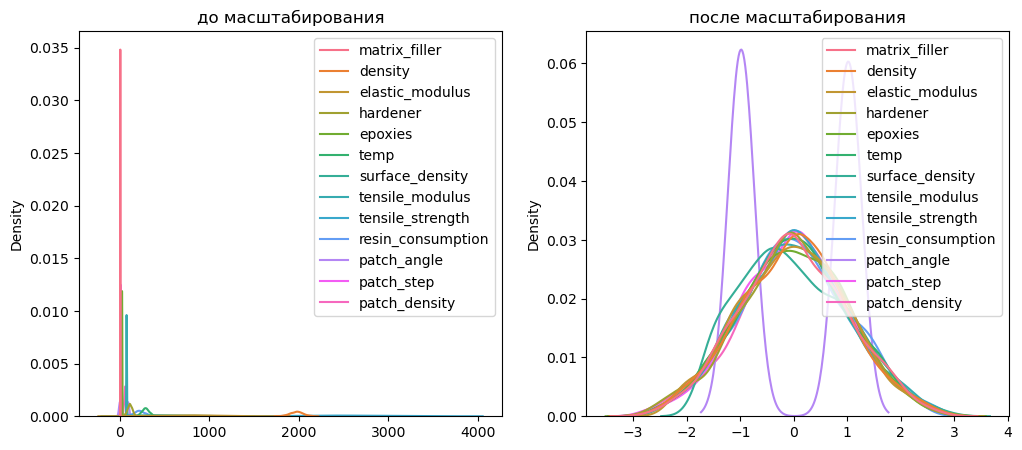

In [60]:
draw_kde(['matrix_filler', 'density', 'elastic_modulus', 'hardener', 'epoxies', 'temp',
          'surface_density', 'tensile_modulus', 'tensile_strength',
          'resin_consumption', 'patch_angle', 'patch_step', 'patch_density'],
         df, df_std, 'до масштабирования', 'после масштабирования')

MinMaxScaler

MinMax-масштабирование x′=(x−min(x))/(max(x)−min(x))
Особенности метода: Среднее значение может варьироваться. Среднеквадратичное отклонение может варьироваться. Форма исходного распределения может изменяться. Максимальные и минимальные значения в диапазоне [0;1]. Выбросы сохраняются.


In [161]:
minmax_scaler = MinMaxScaler()
df_norm = minmax_scaler.fit_transform(df)
df_norm = pd.DataFrame(data = df_norm , columns = ['matrix_filler', 'density', 'elastic_modulus','hardener','epoxies',
                                                'temp','surface_density','tensile_modulus','tensile_strength',
                                                'resin_consumption','patch_angle', 'patch_step','patch_density']
                      )
df_norm.describe().T

count      mean       std  min       25%       50%  \
matrix_filler      1023.0  0.498821  0.187192  0.0  0.372092  0.494988   
density            1023.0  0.504658  0.187871  0.0  0.371411  0.512193   
elastic_modulus    1023.0  0.446447  0.198214  0.0  0.302135  0.447624   
hardener           1023.0  0.502163  0.186237  0.0  0.378699  0.502210   
epoxies            1023.0  0.493677  0.178708  0.0  0.371013  0.492854   
temp               1023.0  0.515617  0.190405  0.0  0.387036  0.515364   
surface_density    1023.0  0.372101  0.215691  0.0  0.206249  0.349615   
tensile_modulus    1023.0  0.489005  0.191799  0.0  0.361445  0.486357   
tensile_strength   1023.0  0.494978  0.189583  0.0  0.364888  0.492462   
resin_consumption  1023.0  0.522755  0.195289  0.0  0.393568  0.526509   
patch_angle        1023.0  0.491691  0.500175  0.0  0.000000  0.000000   
patch_step         1023.0  0.500323  0.183651  0.0  0.369930  0.503637   
patch_density      1023.0  0.513084  0.189699  0.0  0.391631  0.511904   

                        75%  max  
matrix_filler      0.629650  1.0  
density            0.626245  1.0  
elastic_modulus    0.579819  1.0  
hardener           0.632613  1.0  
epoxies            0.623384  1.0  
temp               0.644492  1.0  
surface_density    0.535487  1.0  
tensile_modulus    0.615795  1.0  
tensile_strength   0.613140  1.0  
resin_consumption  0.653680  1.0  
patch_angle        1.000000  1.0  
patch_step         0.624505  1.0  
patch_density      0.635267  1.0

In [62]:
# Проверяем перевод данных из нормализованных в исходные

result_reverse = minmax_scaler.inverse_transform(df_norm)
initial_data = pd.DataFrame(result_reverse, columns = ['matrix_filler', 'density', 'elastic_modulus','hardener','epoxies',
                                                'temp','surface_density','tensile_modulus','tensile_strength',
                                                'resin_consumption','patch_angle', 'patch_step','patch_density'])
initial_data.describe().T

count         mean         std          min          25%  \
matrix_filler      1023.0     2.925149    0.892296     0.547391     2.321061   
density            1023.0  1974.780371   70.843060  1784.482245  1924.535020   
elastic_modulus    1023.0   737.725703  326.453983     2.436909   500.047452   
hardener           1023.0   110.558141   26.661661    38.668500    92.883002   
epoxies            1023.0    22.241659    2.369521    15.695894    20.615227   
temp               1023.0   285.949096   39.355511   179.374391   259.372264   
surface_density    1023.0   480.887409  278.400280     0.603740   266.816645   
tensile_modulus    1023.0    73.310802    3.042662    65.553336    71.287231   
tensile_strength   1023.0  2465.702548  465.480040  1250.392802  2146.295983   
resin_consumption  1023.0   218.089920   57.681967    63.685698   179.932410   
patch_angle        1023.0    44.252199   45.015793     0.000000     0.000000   
patch_step         1023.0     6.870642    2.521972     0.000000     5.080033   
patch_density      1023.0    57.411230   11.142796    27.272928    50.277138   

                           50%          75%          max  
matrix_filler         2.906878     3.548775     5.314144  
density            1977.621657  2020.628746  2161.565216  
elastic_modulus     739.664328   957.386959  1649.415706  
hardener            110.564840   129.233303   181.828448  
epoxies              22.230744    23.961468    28.955094  
temp                285.896812   312.586724   386.067992  
surface_density     451.864365   691.775979  1291.340115  
tensile_modulus      73.268805    75.322176    81.417126  
tensile_strength   2459.524526  2755.823091  3705.672523  
resin_consumption   219.198882   256.760915   359.052220  
patch_angle           0.000000    90.000000    90.000000  
patch_step            6.916144     8.575956    13.732404  
patch_density        57.341920    64.588169    86.012427

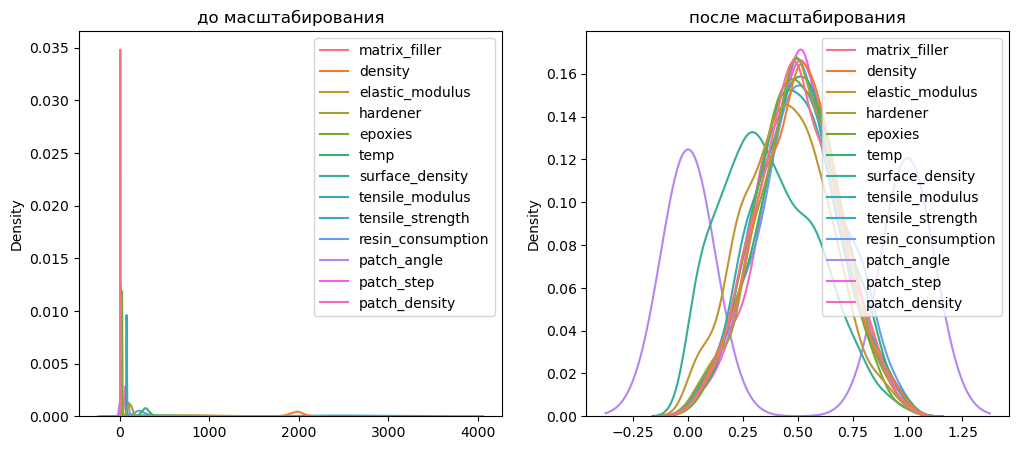

In [63]:
draw_kde(['matrix_filler', 'density', 'elastic_modulus', 'hardener', 'epoxies', 'temp',
          'surface_density', 'tensile_modulus', 'tensile_strength',
          'resin_consumption', 'patch_angle', 'patch_step', 'patch_density'],
         df, df_norm, 'до масштабирования', 'после масштабирования')

<Axes: >

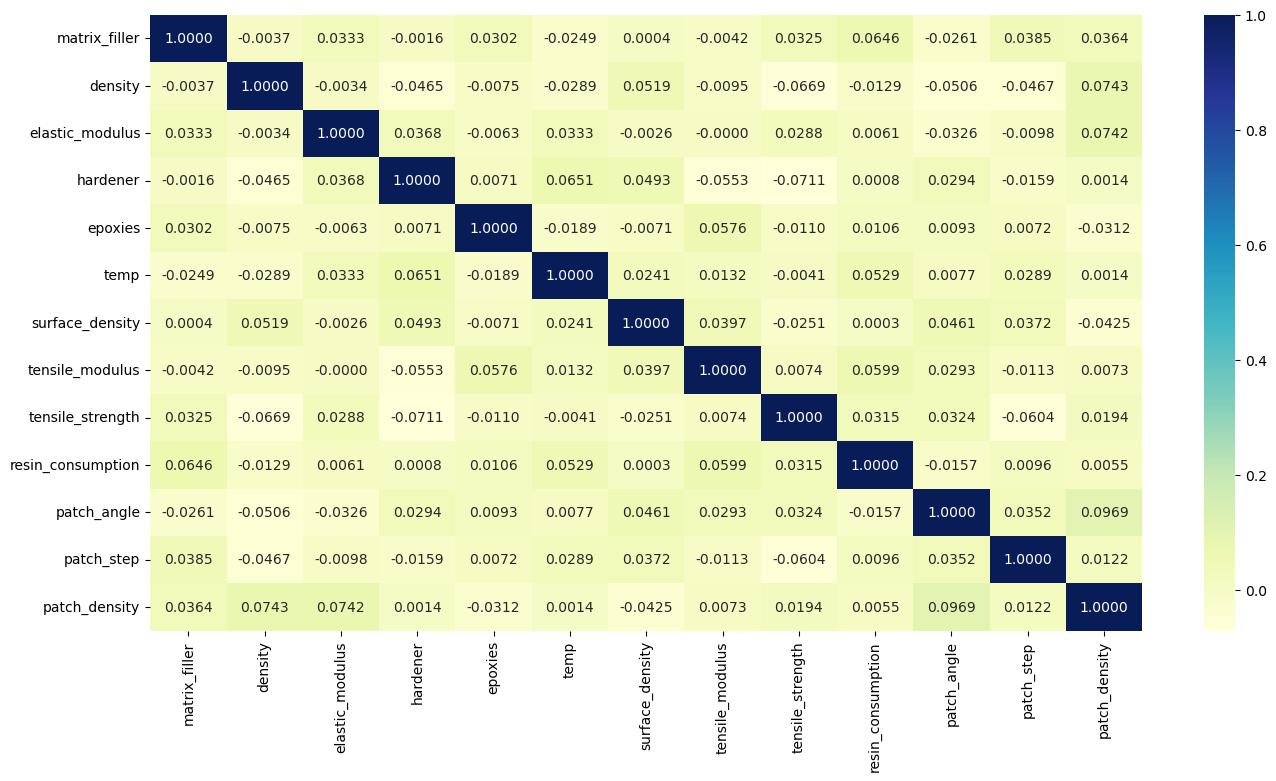

In [64]:
# Посмотрим линейную корреляцию между признаками на тепловой карте

fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(16,8))
sns.heatmap(df_norm.corr(), ax=ax, cmap='YlGnBu',annot=True, fmt='.4f')

МОДЕЛЬ ДЛЯ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 'МОДУЛЬ УПРУГОСТИ ПРИ РАСТЯЖЕНИИ, ГПа'

В задании указано две целевые переменные. Для каждой буду делать отдельную модель машинного обучения. 
При этом решила из входных переменных исключать только одну целевую переменную, а второй параметр оставлять в выборке. Эти два параметра имеют зависимость, хоть и небольшую

In [162]:
# Разделяю выборку на входные переменные и на целевую переменную 'Модуль упругости при растяжении, ГПа'.
# Использую значения, масштабированные с помощью MinMaxScaler

X_modulus = df_norm.copy()
y_modulus = X_modulus.pop('tensile_modulus')
X_modulus.shape, y_modulus.shape

((1023, 12), (1023,))

In [66]:
X_modulus.head()

matrix_filler   density  elastic_modulus  hardener   epoxies      temp  \
0       0.274768  0.651097         0.447061  0.502210  0.495653  0.515364   
1       0.274768  0.651097         0.447061  0.079153  0.607435  0.509164   
2       0.274768  0.651097         0.447061  0.078454  0.492854  0.509164   
3       0.274768  0.651097         0.447061  0.630983  0.418887  0.583596   
4       0.466552  0.651097         0.455721  0.511257  0.495653  0.509164   

   surface_density  tensile_strength  resin_consumption  patch_angle  \
0          0.16223           0.71259           0.529221          0.0   
1          0.16223           0.71259           0.529221          0.0   
2          0.16223           0.71259           0.529221          0.0   
3          0.16223           0.71259           0.529221          0.0   
4          0.16223           0.71259           0.529221          0.0   

   patch_step  patch_density  
0    0.291282       0.506083  
1    0.291282       0.557156  
2    0.291282       0.727399  
3    0.364102       0.335840  
4    0.364102       0.506083

In [67]:
y_modulus.head()

0    0.280303
1    0.280303
2    0.280303
3    0.280303
4    0.280303
Name: tensile_modulus, dtype: float64

In [163]:
# Разделяю на тренировочную и тестовую выборки для задачи с целевой переменной 'Модуль упругости при растяжении, ГПа'
# По заданию размер тестовой выборки должен составлять 30% от всех данных. В обучающей выборке получилось 716 значений,
# в тестовой - 307.

X_modulus_train, X_modulus_test, y_modulus_train, y_modulus_test = train_test_split(X_modulus, y_modulus, 
                                                                                    test_size=0.3, random_state=42)
print('X_modulus_train:', X_modulus_train.shape, 'y_modulus_train:', y_modulus_train.shape)
print('X_modulus_test:', X_modulus_test.shape, 'y_modulus_test:', y_modulus_test.shape)

X_modulus_train: (716, 12) y_modulus_train: (716,)
X_modulus_test: (307, 12) y_modulus_test: (307,)


Чтобы подобрать оптимальную для данной задачи модель попробуем разные варианты. 
Сделаем оценку точности моделей с параметрами по умолчанию. Используем перекрестную проверку.
В качестве базовой модели будем использовать DummyRegressor со стратегией "mean" - всегда предсказывает среднее значение тренировочного набора

In [164]:
model_dummy = DummyRegressor(strategy="mean")
scores = cross_val_score(model_dummy, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_dum1 = scores.mean()
print("DummyRegressor: r2 =", r2_cross_dum1)

model_lin = LinearRegression()
scores = cross_val_score(model_lin, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_lin1 = scores.mean()
print("LinearRegression: r2 =", r2_cross_lin1)

model_ridge = Ridge()
scores = cross_val_score(model_ridge, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_ridge1 = scores.mean()
print("Ridge: r2 =", r2_cross_ridge1)

model_lasso = Lasso()
scores = cross_val_score(model_lasso, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_lasso1 = scores.mean()
print("Lasso: r2 =", r2_cross_lasso1)

model_SVR = SVR()
scores = cross_val_score(model_SVR, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_svr1 = scores.mean()
print("SVR: r2 =", r2_cross_svr1)

model_KN = KNeighborsRegressor()
scores = cross_val_score(model_KN, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_kn1 = scores.mean()
print("KNeighborsRegressor: r2 =", r2_cross_kn1)

model_tree = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(model_tree, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_tree1 = scores.mean()
print("DecisionTreeRegressor: r2 =", r2_cross_tree1)

model_forest = RandomForestRegressor(random_state=42)
scores = cross_val_score(model_forest, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_forest1 = scores.mean()
print("RandomForestRegressor: r2 =", r2_cross_forest1)

model_boost = GradientBoostingRegressor()
scores = cross_val_score(model_boost, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_boost1 = scores.mean()
print("GradientBoostingRegressor: r2 =", r2_cross_boost1)

DummyRegressor: r2 = -0.024186233557172688
LinearRegression: r2 = -0.046036895747093076
Ridge: r2 = -0.04429379615947511
Lasso: r2 = -0.024186233557172688
SVR: r2 = -0.19024348264945729
KNeighborsRegressor: r2 = -0.28264525112161154
DecisionTreeRegressor: r2 = -1.3250769173535724
RandomForestRegressor: r2 = -0.082237733210167
GradientBoostingRegressor: r2 = -0.14739701056059715


Все модели имеют отрицательные и близкие значения коэффициента детерминации. Это значит, что ни одна модель не дает удовлетворительного результата. Хуже всех отработали модели деревья решений, метод ближайших соседей, градиентный бустинг и опорные вектора. Случайный лес отработал чуть лучше. Модель линейной регрессии немного ближе к базовой модели. Модель Лассо-регрессии показала результат такой же, как базовая модель.

DummyRegressor

In [70]:
# Базовая модель для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
# Выбираем стратегию использования для создания прогнозов «mean»: всегда предсказывает среднее значение тренировочного набора

model_DummyRegressor = DummyRegressor(strategy="mean")
model_DummyRegressor.fit(X_modulus_train, y_modulus_train)

preds_modulus_dum_train = model_DummyRegressor.predict(X_modulus_train)
preds_modulus_dum_test = model_DummyRegressor.predict(X_modulus_test)

# Оцениваем точность модели на тренировочной выборке
MAE_dum_train = mean_absolute_error(y_modulus_train, preds_modulus_dum_train)
MSE_dum_train = mean_squared_error (y_modulus_train, preds_modulus_dum_train)
r2_dum_train = r2_score(y_modulus_train, preds_modulus_dum_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_dum_train) 
print('MSE_train:', MSE_dum_train) 
print('r2_train', r2_dum_train)

# Оцениваем точность модели на тестовой выборке
MAE_dum_test = mean_absolute_error(y_modulus_test, preds_modulus_dum_test)
MSE_dum_test = mean_squared_error (y_modulus_test, preds_modulus_dum_test)
r2_dum_test = r2_score(y_modulus_test, preds_modulus_dum_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_dum_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_dum_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_dum_test))

Точность модели на тренировочных данных
MAE_train: 0.15320351835890222
MSE_train: 0.036309749696186826
r2_train 0.0

Точность модели на тестовых данных
MAE_test: 0.15754161036857214
MSE_test: 0.03799959425226677
r2_test -0.01963629243147702


LinearRegression

In [71]:
# Модель линейной регрессии для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_modulus_train, y_modulus_train)

preds_modulus_lin_train = model_LinearRegression.predict(X_modulus_train)
preds_modulus_lin_test = model_LinearRegression.predict(X_modulus_test)

# Оцениваем точность модели на тренировочной выборке
MAE_lin_train = mean_absolute_error(y_modulus_train, preds_modulus_lin_train)
MSE_lin_train = mean_squared_error (y_modulus_train, preds_modulus_lin_train)
r2_lin_train = r2_score(y_modulus_train, preds_modulus_lin_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_lin_train) 
print('MSE_train:', MSE_lin_train) 
print('r2_train', r2_lin_train)

# Оцениваем точность модели на тестовой выборке
MAE_lin_test = mean_absolute_error(y_modulus_test, preds_modulus_lin_test)
MSE_lin_test = mean_squared_error (y_modulus_test, preds_modulus_lin_test)
r2_lin_test = r2_score(y_modulus_test, preds_modulus_lin_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_lin_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_lin_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_lin_test))

Точность модели на тренировочных данных
MAE_train: 0.15208373001958653
MSE_train: 0.035699652113768784
r2_train 0.016802582984539627

Точность модели на тестовых данных
MAE_test: 0.15848666523944643
MSE_test: 0.03817655117407368
r2_test -0.02438454575422222


ПОДБИРАЕМ ГИПЕРПАРАМЕТРЫ, ОБУЧАЕМ МОДЕЛИ И ДЕЛАЕМ ПРОГНОЗЫ

RIDGE

In [72]:
#Подбираем гиперпараметры для Ridge

#alpha - константа, контролирующая силу регуляризации. Должна быть неотрицательным числом с плавающей запятой
#solver - решатель для использования в вычислительных процедурах.
#positive - только для ‘lbfgs’.
#lbfgs использует алгоритм L-BFGS-B, реализованный в scipy.optimize.minimize. Его можно использовать только тогда, 
#когда positive имеет значение True.

In [73]:
param_ridge = [{'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'], 'alpha': range(0, 100, 10)},
                {'solver': ['lbfgs'], 'alpha': range(0, 100, 10), 'positive': [True]}]
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_ridge, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_modulus_train, y_modulus_train)
print('Оптимальные гиперпараметры для модели Ridge:', grid_search.best_params_)

Оптимальные гиперпараметры для модели Ridge: {'alpha': 10, 'positive': True, 'solver': 'lbfgs'}


In [74]:
# Модель гребневой регрессии для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
# Обучаем и делаем прогноз
model_Ridge =  Ridge(solver='lbfgs', alpha=10, positive=True)
model_Ridge.fit(X_modulus_train, y_modulus_train)

preds_modulus_ridge_train = model_Ridge.predict(X_modulus_train)
preds_modulus_ridge_test = model_Ridge.predict(X_modulus_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_Ridge, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_ridge_grid1 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_ridge_grid1)

# Оцениваем точность модели на тренировочной выборке
MAE_ridge_train = mean_absolute_error(y_modulus_train, preds_modulus_ridge_train)
MSE_ridge_train = mean_squared_error (y_modulus_train, preds_modulus_ridge_train)
r2_ridge_train = r2_score(y_modulus_train, preds_modulus_ridge_train)
print('')
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_ridge_train) 
print('MSE_train:', MSE_ridge_train) 
print('r2_train', r2_ridge_train)

# Оцениваем точность модели на тестовой выборке
MAE_ridge_test = mean_absolute_error(y_modulus_test, preds_modulus_ridge_test)
MSE_ridge_test = mean_squared_error (y_modulus_test, preds_modulus_ridge_test)
r2_ridge_test = r2_score(y_modulus_test, preds_modulus_ridge_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_ridge_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_ridge_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_ridge_test))

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.025152136322729134

Точность модели на тренировочных данных
MAE_train: 0.15248783710227864
MSE_train: 0.03605017439292869
r2_train 0.007148914697294062

Точность модели на тестовых данных
MAE_test: 0.1569465600286865
MSE_test: 0.037731258917783395
r2_test -0.012436098561915854


LASSO

In [75]:
#Подобраем гиперпараметры для Lasso

#alpha - константа, контролирующая силу регуляризации. Должна быть неотрицательным числом с плавающей запятой

In [76]:
param_lasso = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_lasso, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_modulus_train, y_modulus_train)
print('Оптимальные гиперпараметры для модели Lasso:', grid_search.best_params_)

Оптимальные гиперпараметры для модели Lasso: {'alpha': 0.01}


In [77]:
# Модель метода регрессии лассо для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
# Обучаем и делаем прогноз
model_lasso =  Lasso(alpha=0.01)
model_lasso.fit(X_modulus_train, y_modulus_train)

preds_modulus_lasso_train = model_lasso.predict(X_modulus_train)
preds_modulus_lasso_test = model_lasso.predict(X_modulus_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_lasso, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_lasso_grid1 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_lasso_grid1)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_lasso_train = mean_absolute_error(y_modulus_train, preds_modulus_lasso_train)
MSE_lasso_train = mean_squared_error (y_modulus_train, preds_modulus_lasso_train)
r2_lasso_train = r2_score(y_modulus_train, preds_modulus_lasso_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_lasso_train) 
print('MSE_train:', MSE_lasso_train) 
print('r2_train', r2_lasso_train)

# Оцениваем точность модели на тестовой выборке
MAE_lasso_test = mean_absolute_error(y_modulus_test, preds_modulus_lasso_test)
MSE_lasso_test = mean_squared_error (y_modulus_test, preds_modulus_lasso_test)
r2_lasso_test = r2_score(y_modulus_test, preds_modulus_lasso_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_lasso_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_lasso_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_lasso_test))


Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.024186233557172688

Точность модели на тренировочных данных
MAE_train: 0.15320351835890222
MSE_train: 0.036309749696186826
r2_train 0.0

Точность модели на тестовых данных
MAE_test: 0.15754161036857214
MSE_test: 0.03799959425226677
r2_test -0.01963629243147702


SVR

In [78]:
#Подобраем гиперпараметры для SVR (векторная регрессия линейной подержки)

# kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}
# C - параметр регуляризации (по умолчанию 1)

In [79]:
param_svr = [{'kernel': ['linear'],'C': [0.001, 0.005, 0.01, 0.5]},
             {'kernel': ['poly'],'C': [0.001, 0.005, 0.01, 0.5]},
             {'kernel': ['rbf'],'C': [ 0.001, 0.005, 0.01, 0.02, 0.03, 0.5]},
             {'kernel': ['sigmoid'],'C': [0.001, 0.005, 0.01, 0.5]}
            ]
svr = SVR()
grid_search = GridSearchCV(svr, param_svr, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_modulus_train, y_modulus_train)
print('Оптимальные гиперпараметры для модели SVR:', grid_search.best_params_)

Оптимальные гиперпараметры для модели SVR: {'C': 0.02, 'kernel': 'rbf'}


In [80]:
# Модель метода регрессии лассо для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
# Обучаем и делаем прогноз
model_svr =  SVR(C=0.02, kernel='rbf')
model_svr.fit(X_modulus_train, y_modulus_train)

preds_modulus_svr_train = model_svr.predict(X_modulus_train)
preds_modulus_svr_test = model_svr.predict(X_modulus_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_svr, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_svr_grid1 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_svr_grid1)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_svr_train = mean_absolute_error(y_modulus_train, preds_modulus_svr_train)
MSE_svr_train = mean_squared_error (y_modulus_train, preds_modulus_svr_train)
r2_svr_train = r2_score(y_modulus_train, preds_modulus_svr_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_svr_train) 
print('MSE_train:', MSE_svr_train) 
print('r2_train', r2_svr_train)

# Оцениваем точность модели на тестовой выборке
MAE_svr_test = mean_absolute_error(y_modulus_test, preds_modulus_svr_test)
MSE_svr_test = mean_squared_error (y_modulus_test, preds_modulus_svr_test)
r2_svr_test = r2_score(y_modulus_test, preds_modulus_svr_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_svr_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_svr_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_svr_test))


Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.012239344089344083

Точность модели на тренировочных данных
MAE_train: 0.1471113727652481
MSE_train: 0.03359791257966795
r2_train 0.07468619693634704

Точность модели на тестовых данных
MAE_test: 0.15852374493455024
MSE_test: 0.038807539666305416
r2_test -0.04131574671691962


KNeighborsRegressor

In [81]:
# Подбираем гиперпараметры для KNeighborsRegressor

# n_neighbor - количество соседей (по умолчанию = 5)

In [82]:
param_kn = {'n_neighbors': range(2, 100, 2)}
kn = KNeighborsRegressor()
grid_search = GridSearchCV(kn, param_kn, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_modulus_train, y_modulus_train)
print('Оптимальные гиперпараметры для модели KNeighborsRegressor:', grid_search.best_params_)

Оптимальные гиперпараметры для модели KNeighborsRegressor: {'n_neighbors': 52}


In [83]:
# Модель блиайших соседей для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
model_KNeighborsRegressor =  KNeighborsRegressor(n_neighbors=52)
model_KNeighborsRegressor.fit(X_modulus_train, y_modulus_train)

preds_modulus_KN_train = model_KNeighborsRegressor.predict(X_modulus_train)
preds_modulus_KN_test = model_KNeighborsRegressor.predict(X_modulus_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_KNeighborsRegressor, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_kn_grid1 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_kn_grid1)
print('')


# Оцениваем точность модели на тренировочной выборке
MAE_KN_train = mean_absolute_error(y_modulus_train, preds_modulus_KN_train)
MSE_KN_train = mean_squared_error (y_modulus_train, preds_modulus_KN_train)
r2_KN_train = r2_score(y_modulus_train, preds_modulus_KN_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_KN_train) 
print('MSE_train:', MSE_KN_train) 
print('r2_train', r2_KN_train)

# Оцениваем точность модели на тестовой выборке
MAE_KN_test = mean_absolute_error(y_modulus_test, preds_modulus_KN_test)
MSE_KN_test = mean_squared_error (y_modulus_test, preds_modulus_KN_test)
r2_KN_test = r2_score(y_modulus_test, preds_modulus_KN_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_KN_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_KN_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_KN_test))

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.016572791772873973

Точность модели на тренировочных данных
MAE_train: 0.15099350196896794
MSE_train: 0.0350244824890495
r2_train 0.035397302870206926

Точность модели на тестовых данных
MAE_test: 0.15803733174671897
MSE_test: 0.03818282297266738
r2_test -0.024552835800228934


DecisionTreeRegressor

In [84]:
# Подбираем гиперпараметры для DecisionTreeRegressor
#
# criterion - функция измерения качества разделения
# max_depth - максимальная грубина дерева
# max_features - количество функций, которые учитываются

In [85]:
param_tree = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter': ['best', 'random'],'max_depth': [1, 2, 3],    'max_features': range(1, 11, 1)}
tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree, param_tree, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_modulus_train, y_modulus_train)
print('Оптимальные гиперпараметры для модели DecisionTreeRegressor:', grid_search.best_params_)

Оптимальные гиперпараметры для модели DecisionTreeRegressor: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 9, 'splitter': 'random'}


In [86]:
# Модель дерево решений для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
# Обучаем и делаем прогноз

model_DecisionTreeRegressor = DecisionTreeRegressor(criterion='squared_error', max_depth=3, max_features=9, 
                                                    splitter='random' , random_state=42)
model_DecisionTreeRegressor.fit(X_modulus_train, y_modulus_train)

preds_modulus_tree_train = model_DecisionTreeRegressor.predict(X_modulus_train)
preds_modulus_tree_test = model_DecisionTreeRegressor.predict(X_modulus_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_DecisionTreeRegressor, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_tree_grid1 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_tree_grid1)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_tree_train = mean_absolute_error(y_modulus_train, preds_modulus_tree_train)
MSE_tree_train = mean_squared_error (y_modulus_train, preds_modulus_tree_train)
r2_tree_train = r2_score(y_modulus_train, preds_modulus_tree_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_tree_train) 
print('MSE_train:', MSE_tree_train) 
print('r2_train', r2_tree_train)

# Оцениваем точность модели на тестовой выборке
MAE_tree_test = mean_absolute_error(y_modulus_test, preds_modulus_tree_test)
MSE_tree_test = mean_squared_error (y_modulus_test, preds_modulus_tree_test)
r2_tree_test = r2_score(y_modulus_test, preds_modulus_tree_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_tree_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_tree_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_tree_test))

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.019664000942646375

Точность модели на тренировочных данных
MAE_train: 0.14822230103472278
MSE_train: 0.03427066652589186
r2_train 0.0561580067986287

Точность модели на тестовых данных
MAE_test: 0.1596063822140964
MSE_test: 0.03920624800337529
r2_test -0.052014215965632715


RandomForestRegressor

In [87]:
#Подобраем гиперпараметры для RandomForestRegressor

#n_estimators - количество деревьев, 
#max_depth - максимальная глубина деревьев, 
#max_features - число признаков для выбора расщепления

In [88]:
param_forest = {'n_estimators':[2,3,4], 'max_depth': [1, 2, 3], 'max_features': [2, 3, 4]}
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_forest, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_modulus_train, y_modulus_train)
print('Оптимальные гиперпараметры для модели RandomForestRegressor:', grid_search.best_params_)

Оптимальные гиперпараметры для модели RandomForestRegressor: {'max_depth': 2, 'max_features': 3, 'n_estimators': 2}


In [89]:
# Модель случайного леса для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
# Обучаем и делаем прогноз

model_RandomForest = RandomForestRegressor(max_depth=2,  max_features=3, n_estimators=2, random_state=42)
model_RandomForest.fit(X_modulus_train, y_modulus_train)

preds_modulus_forest_train = model_RandomForest.predict(X_modulus_train)
preds_modulus_forest_test = model_RandomForest.predict(X_modulus_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_RandomForest, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_forest_grid1 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_forest_grid1)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_forest_train = mean_absolute_error(y_modulus_train, preds_modulus_forest_train)
MSE_forest_train = mean_squared_error (y_modulus_train, preds_modulus_forest_train)
r2_forest_train = r2_score(y_modulus_train, preds_modulus_forest_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_forest_train) 
print('MSE_train:', MSE_forest_train) 
print('r2_train', r2_forest_train)

# Оцениваем точность модели на тестовой выборке
MAE_forest_test = mean_absolute_error(y_modulus_test, preds_modulus_forest_test)
MSE_forest_test = mean_squared_error (y_modulus_test, preds_modulus_forest_test)
r2_forest_test = r2_score(y_modulus_test, preds_modulus_forest_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_forest_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_forest_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_forest_test))

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.023211873706254205

Точность модели на тренировочных данных
MAE_train: 0.15138881391380699
MSE_train: 0.03539659146850358
r2_train 0.025149119322602775

Точность модели на тестовых данных
MAE_test: 0.16018321704874808
MSE_test: 0.03935263410555392
r2_test -0.05594216797212037


GradientBoostingRegressor

In [90]:
#Подобраем гиперпараметры для GradientBoostingRegressor

#loss{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’
#learning_ratefloat, default=0.1
#n_estimatorsint, default=100
#subsamplefloat, default=1.0
#criterion{‘friedman_mse’, ‘squared_error’}, default=’friedman_mse’
#min_samples_splitint or float, default=2

In [99]:
param_boost = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
               'learning_rate': [0.01, 0.05, 0.1],
               'n_estimators': [10, 30, 50],
               'criterion':['friedman_mse', 'squared_error'],
               'min_samples_split':[0.5, 1.0]
              }
boost = GradientBoostingRegressor()
grid_search = GridSearchCV(boost, param_boost, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_modulus_train, y_modulus_train)
print('Оптимальные гиперпараметры для модели RandomForestRegressor:', grid_search.best_params_)

Оптимальные гиперпараметры для модели RandomForestRegressor: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'huber', 'min_samples_split': 0.5, 'n_estimators': 30}


In [92]:
# Модель градиентного бустинга для выборки с целевой переменной 'Модуль упругости при растяжении, ГПа'
model_GradientBoostingRegressor =  GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.01, 
                                                             loss='squared_error', min_samples_split=2, n_estimators=10)
model_GradientBoostingRegressor.fit(X_modulus_train, y_modulus_train)

preds_modulus_boost_train = model_GradientBoostingRegressor.predict(X_modulus_train)
preds_modulus_boost_test = model_GradientBoostingRegressor.predict(X_modulus_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_GradientBoostingRegressor, X_modulus_train, y_modulus_train, cv=10, scoring ='r2')
r2_cross_boost_grid1 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_boost_grid1)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_boost_train = mean_absolute_error(y_modulus_train, preds_modulus_boost_train)
MSE_boost_train = mean_squared_error (y_modulus_train, preds_modulus_boost_train)
r2_boost_train = r2_score(y_modulus_train, preds_modulus_boost_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_boost_train) 
print('MSE_train:', MSE_boost_train) 
print('r2_train', r2_boost_train)

# Оцениваем точность модели на тестовой выборке
MAE_boost_test = mean_absolute_error(y_modulus_test, preds_modulus_boost_test)
MSE_boost_test = mean_squared_error (y_modulus_test, preds_modulus_boost_test)
r2_boost_test = r2_score(y_modulus_test, preds_modulus_boost_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_boost_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_boost_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_boost_test))

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.024152870755866362

Точность модели на тренировочных данных
MAE_train: 0.1522075020506985
MSE_train: 0.03583052081581106
r2_train 0.013198352629406607

Точность модели на тестовых данных
MAE_test: 0.15745758270966945
MSE_test: 0.03799207749347648
r2_test -0.019434596591959563


Многослойный перцептрон MLPRegressor из библиотеки Sklearn

In [93]:
#  Настроим нейросеть
model_modulus_MLP = MLPRegressor(
    hidden_layer_sizes = (8, 8),
    activation = 'relu',
    solver='sgd',
    max_iter=100,
    early_stopping = True,
    validation_fraction = 0.1,
    random_state=42, 
    verbose=True
)

In [94]:
%%time
# Обучаем нейросеть
model_modulus_MLP.fit(X_modulus_train, y_modulus_train)

Iteration 1, loss = 0.06365238
Validation score: -2.681633
Iteration 2, loss = 0.05944058
Validation score: -2.357683
Iteration 3, loss = 0.05370282
Validation score: -2.010661
Iteration 4, loss = 0.04791233
Validation score: -1.698345
Iteration 5, loss = 0.04268990
Validation score: -1.450071
Iteration 6, loss = 0.03853684
Validation score: -1.265795
Iteration 7, loss = 0.03548763
Validation score: -1.140897
Iteration 8, loss = 0.03327359
Validation score: -1.065137
Iteration 9, loss = 0.03197917
Validation score: -1.022871
Iteration 10, loss = 0.03105114
Validation score: -1.002224
Iteration 11, loss = 0.03056377
Validation score: -0.991845
Iteration 12, loss = 0.03024971
Validation score: -0.985566
Iteration 13, loss = 0.03006894
Validation score: -0.980345
Iteration 14, loss = 0.02992775
Validation score: -0.975102
Iteration 15, loss = 0.02979992
Validation score: -0.969711
Iteration 16, loss = 0.02969358
Validation score: -0.963182
Iteration 17, loss = 0.02958342
Validation score:

C:\Users\1\anaconda3\envs\VKR_new\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(8, 8), max_iter=100,
             random_state=42, solver='sgd', verbose=True)

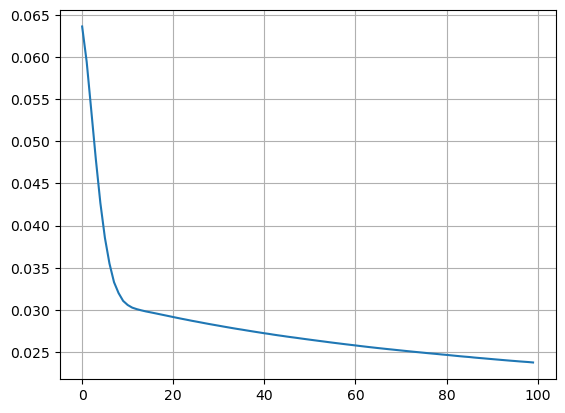

In [95]:
# График ошибки
plt.plot(model_modulus_MLP.loss_curve_)
plt.grid(True)
plt.show()

In [96]:
# Предсказание нейросети
preds_modulus_MLP_train = model_modulus_MLP.predict(X_modulus_train)
preds_modulus_MLP_test = model_modulus_MLP.predict(X_modulus_test)

# Оцениваем точность модели на тренировочной выборке
MAE_MLP_train = mean_absolute_error(y_modulus_train, preds_modulus_MLP_train)
MSE_MLP_train = mean_squared_error (y_modulus_train, preds_modulus_MLP_train)
r2_MLP_train = r2_score(y_modulus_train, preds_modulus_MLP_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_MLP_train) 
print('MSE_train:', MSE_MLP_train) 
print('r2_train', r2_MLP_train)

# Оцениваем точность модели на тестовой выборке
MAE_MLP_test = mean_absolute_error(y_modulus_test, preds_modulus_MLP_test)
MSE_MLP_test = mean_squared_error (y_modulus_test, preds_modulus_MLP_test)
r2_MLP_test = r2_score(y_modulus_test, preds_modulus_MLP_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', mean_absolute_error(y_modulus_test, preds_modulus_MLP_test)) 
print('MSE_test:', mean_squared_error (y_modulus_test, preds_modulus_MLP_test)) 
print('r2_test', r2_score(y_modulus_test, preds_modulus_MLP_test))

Точность модели на тренировочных данных
MAE_train: 0.17609739628003915
MSE_train: 0.04756317973117751
r2_train -0.30992860400170974

Точность модели на тестовых данных
MAE_test: 0.17758671601933482
MSE_test: 0.047303430999490616
r2_test -0.2692844740238678


СРАВНЕНИЕ МОДЕЛЕЙ С ПАРАМЕТРАМИ ПО УМОЛЧАНИЮ И С ПОДОБРАННЫМИ ОПТИМАЛЬНЫМИ ГИПЕРПАРАМЕТРАМИ (МЕТРИКА R2, КРОСС-ВАЛИДАЦИЯ)
                                                                                            

In [165]:
r2_cross_val = {'Регрессор': ['RIDGE',  'Lasso', 'KNeighbors', 'SVR',
                        'DecisionTree', 'RandomForestRegressor','GradientBoosting'], 
         'r2': [r2_cross_ridge1, r2_cross_lasso1, r2_cross_kn1, r2_cross_svr1,
                r2_cross_tree1, r2_cross_forest1, r2_cross_boost1],
         'r2_grid': [r2_cross_ridge_grid1, r2_cross_lasso_grid1, r2_cross_kn_grid1, r2_cross_svr_grid1,
                r2_cross_tree_grid1, r2_cross_forest_grid1, r2_cross_boost_grid1]
         } 

r2_cross_val = pd.DataFrame(r2_cross_val)
r2_cross_val

Регрессор        r2   r2_grid
0                  RIDGE -0.044294 -0.025152
1                  Lasso -0.024186 -0.024186
2             KNeighbors -0.282645 -0.016573
3                    SVR -0.190243 -0.012239
4           DecisionTree -1.325077 -0.019664
5  RandomForestRegressor -0.082238 -0.023212
6       GradientBoosting -0.147397 -0.024153

После подбора гиперпараметров метрика r2, определенная с помощью кросс-валидации, для всех моделей, кроме Лассо, уменьшилась.

CРАВНЕНИЕ МОДЕЛЕЙ ПО МЕТРИКАМ

In [100]:
# Сравниваем наши модели по метрикам для тренировочной и тестовой выборки
metrics_df = {'Регрессор': ['DummerRegressor', 'LinearRegression', 'RIDGE',  'Lasso', 'KNeighbors', 'SVR',
                        'DecisionTree', 'RandomForestRegressor','GradientBoosting', 'MLP'], 
         'r2_train': [r2_dum_train, r2_lin_train, r2_ridge_train, r2_lasso_train, r2_KN_train, r2_svr_train,
                r2_tree_train, r2_forest_train, r2_boost_train, r2_MLP_train],
         'MAE_train': [MAE_dum_train, MAE_lin_train, MAE_ridge_train, MAE_lasso_train, MAE_KN_train, MAE_svr_train,
                 MAE_tree_train, MAE_forest_train, MAE_boost_train, MAE_MLP_train],
         'MSE_train': [MSE_dum_train, MSE_lin_train, MSE_ridge_train, MSE_lasso_train, MSE_KN_train, MSE_svr_train,
                 MSE_tree_train, MSE_forest_train, MSE_boost_train, MSE_MLP_train],
        'r2_test': [r2_dum_test, r2_lin_test, r2_ridge_test, r2_lasso_test, r2_KN_test, r2_svr_test,
                r2_tree_test, r2_forest_test, r2_boost_test, r2_MLP_test],
         'MAE_test': [MAE_dum_test, MAE_lin_test, MAE_ridge_test, MAE_lasso_test, MAE_KN_test, MAE_svr_test,
                 MAE_tree_test, MAE_forest_test, MAE_boost_test, MAE_MLP_test],
         'MSE_test': [MSE_dum_test, MSE_lin_test, MSE_ridge_test, MSE_lasso_test, MSE_KN_test, MSE_svr_test,
                 MSE_tree_test, MSE_forest_test, MSE_boost_test, MSE_MLP_test]
         } 

metrics_df = pd.DataFrame(metrics_df)
metrics_df

Регрессор  r2_train  MAE_train  MSE_train   r2_test  MAE_test  \
0        DummerRegressor  0.000000   0.153204   0.036310 -0.019636  0.157542   
1       LinearRegression  0.016803   0.152084   0.035700 -0.024385  0.158487   
2                  RIDGE  0.007149   0.152488   0.036050 -0.012436  0.156947   
3                  Lasso  0.000000   0.153204   0.036310 -0.019636  0.157542   
4             KNeighbors  0.035397   0.150994   0.035024 -0.024553  0.158037   
5                    SVR  0.074686   0.147111   0.033598 -0.041316  0.158524   
6           DecisionTree  0.056158   0.148222   0.034271 -0.052014  0.159606   
7  RandomForestRegressor  0.025149   0.151389   0.035397 -0.055942  0.160183   
8       GradientBoosting  0.013198   0.152208   0.035831 -0.019435  0.157458   
9                    MLP -0.309929   0.176097   0.047563 -0.269284  0.177587   

   MSE_test  
0  0.038000  
1  0.038177  
2  0.037731  
3  0.038000  
4  0.038183  
5  0.038808  
6  0.039206  
7  0.039353  
8  0.037992  
9  0.047303

Оценив точность моделей на обучающей выборке можно сказать, что лучшую метрику r2 дала модель метода опорных векторов SVR. Значение коэффициента детерминации  равно 0.074. Для тестовой выборки значения r2 для всех моделей отрицательные и близкие к нулю. Лучшие значения метрики дала RIDGE регрессия. r2 для нее немного лучше базовой модели, -0.012 против -0.019. MAE и MSE тоже примерно одинаковые для всех моделей. Самый худший результат у многослойного перцептрона, но, что интересно, значения на тестовой выборке лучше, чем на обучающей. Это означает, что чему-то сеть все-таки научилась. Возможно, работу нейронную сети можно было бы улучшить, если тщательней подобрать параметры сети. 
Ни одна модель не смогла найти закономерности во входных данных и научиться делать прогноз удовлетворительной точности.

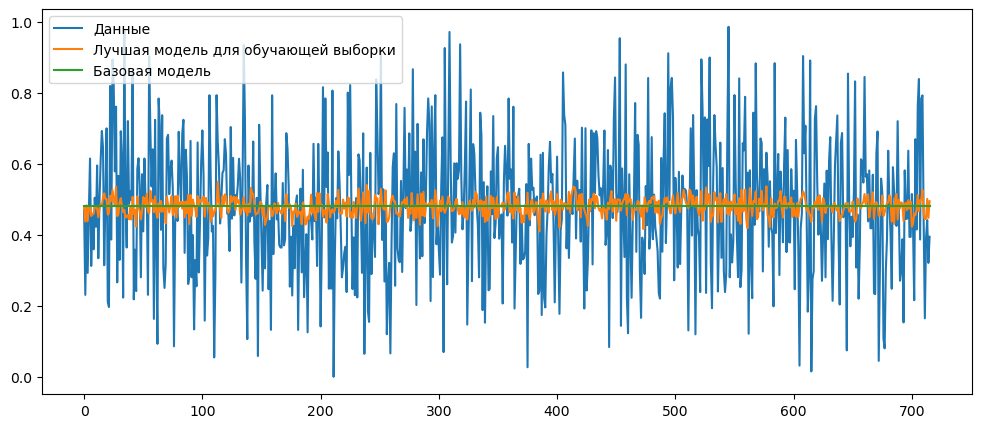

In [101]:
# Визуализация для обучающей выборки
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_modulus_train.values, label='Данные')
ax.plot(preds_modulus_svr_train, label='Лучшая модель для обучающей выборки')
ax.plot(preds_modulus_dum_train, label='Базовая модель')
ax.legend()
plt.show()

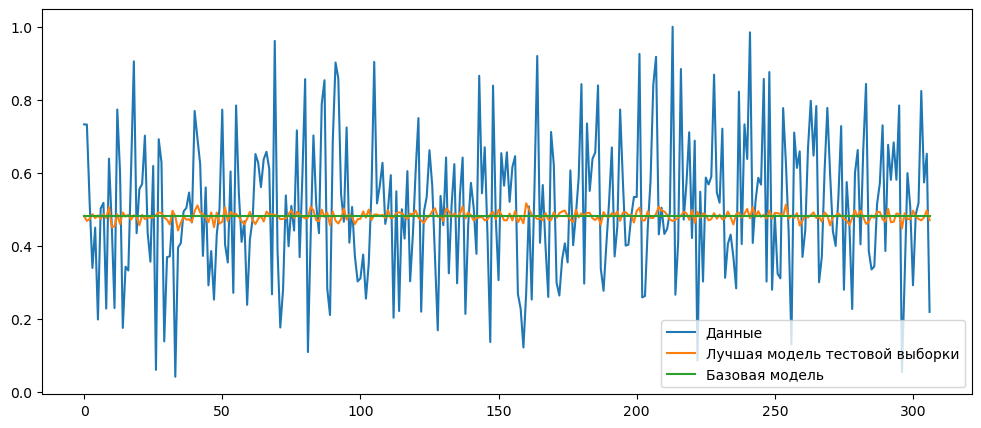

In [102]:
# Визуализация для тестовой выборки
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_modulus_test.values, label='Данные')
ax.plot(preds_modulus_ridge_test, label='Лучшая модель тестовой выборки')
ax.plot(preds_modulus_dum_test, label='Базовая модель')
ax.legend()
plt.show()

МОДЕЛЬ ДЛЯ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 'ПРОЧНОСТЬ ПРИ РАСТЯЖЕНИИ, МПа'

In [185]:
df_norm.describe().T

count      mean       std  min       25%       50%  \
matrix_filler      1023.0  0.498821  0.187192  0.0  0.372092  0.494988   
density            1023.0  0.504658  0.187871  0.0  0.371411  0.512193   
elastic_modulus    1023.0  0.446447  0.198214  0.0  0.302135  0.447624   
hardener           1023.0  0.502163  0.186237  0.0  0.378699  0.502210   
epoxies            1023.0  0.493677  0.178708  0.0  0.371013  0.492854   
temp               1023.0  0.515617  0.190405  0.0  0.387036  0.515364   
surface_density    1023.0  0.372101  0.215691  0.0  0.206249  0.349615   
tensile_modulus    1023.0  0.489005  0.191799  0.0  0.361445  0.486357   
tensile_strength   1023.0  0.494978  0.189583  0.0  0.364888  0.492462   
resin_consumption  1023.0  0.522755  0.195289  0.0  0.393568  0.526509   
patch_angle        1023.0  0.491691  0.500175  0.0  0.000000  0.000000   
patch_step         1023.0  0.500323  0.183651  0.0  0.369930  0.503637   
patch_density      1023.0  0.513084  0.189699  0.0  0.391631  0.511904   

                        75%  max  
matrix_filler      0.629650  1.0  
density            0.626245  1.0  
elastic_modulus    0.579819  1.0  
hardener           0.632613  1.0  
epoxies            0.623384  1.0  
temp               0.644492  1.0  
surface_density    0.535487  1.0  
tensile_modulus    0.615795  1.0  
tensile_strength   0.613140  1.0  
resin_consumption  0.653680  1.0  
patch_angle        1.000000  1.0  
patch_step         0.624505  1.0  
patch_density      0.635267  1.0

In [186]:
# Добавим два столбца с новыми признаками созданными с помощью PCA
df_pca = df_norm.join(X_pca.PC3)
df_pca['from_pc3'] = X.hardener + X.density                    
df_pca.head().T

0         1         2         3         4
matrix_filler      0.274768  0.274768  0.274768  0.274768  0.466552
density            0.651097  0.651097  0.651097  0.651097  0.651097
elastic_modulus    0.447061  0.447061  0.447061  0.447061  0.455721
hardener           0.502210  0.079153  0.078454  0.630983  0.511257
epoxies            0.495653  0.607435  0.492854  0.418887  0.495653
temp               0.515364  0.509164  0.509164  0.583596  0.509164
surface_density    0.162230  0.162230  0.162230  0.162230  0.162230
tensile_modulus    0.280303  0.280303  0.280303  0.280303  0.280303
tensile_strength   0.712590  0.712590  0.712590  0.712590  0.712590
resin_consumption  0.529221  0.529221  0.529221  0.529221  0.529221
patch_angle        0.000000  0.000000  0.000000  0.000000  0.000000
patch_step         0.291282  0.291282  0.291282  0.364102  0.364102
patch_density      0.506083  0.557156  0.727399  0.335840  0.506083
PC3                0.172419  0.113079  0.113376 -0.131023 -0.080169
from_pc3           0.694187  0.804554  0.804003  1.240506  1.145921

In [187]:
# Разделим обучающий датафрейм на целевую и входные переменные

X_strength = df_pca.copy()
y_strength = X_strength.pop('tensile_strength')
X_strength.shape, y_strength.shape

((1023, 14), (1023,))

In [188]:
# Разделяю на тренировочную и тестовую выборки для задачи с целевой переменной 'Модуль упругости при растяжении, ГПа'
# По заданию размер тестовой выборки должен составлять 30% от всех данных. В обучающей выборке получилось 716 значений,
# в тестовой - 307.

X_strength_train, X_strength_test, y_strength_train, y_strength_test = train_test_split(X_strength, y_strength, 
                                                                                    test_size=0.3, random_state=42)
print('X_strength_train:', X_strength_train.shape, 'y_strength_train:', y_strength_train.shape)
print('X_strength_test:', X_strength_test.shape, 'y_strength_test:', y_strength_test.shape)

X_strength_train: (716, 14) y_strength_train: (716,)
X_strength_test: (307, 14) y_strength_test: (307,)


In [189]:
model_dummy = DummyRegressor(strategy="mean")
scores = cross_val_score(model_dummy, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_dum2 = scores.mean()
print("DummyRegressor: r2 =", r2_cross_dum2)

model_lin = LinearRegression()
scores = cross_val_score(model_lin, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_lin2 = scores.mean()
print("LinearRegression: r2 =", r2_cross_lin2)

model_ridge = Ridge()
scores = cross_val_score(model_ridge, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_ridge2 = scores.mean()
print("Ridge: r2 =", r2_cross_ridge2)

model_lasso = Lasso()
scores = cross_val_score(model_lasso, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_lasso2 = scores.mean()
print("Lasso: r2 =", r2_cross_lasso2)

model_SVR = SVR()
scores = cross_val_score(model_SVR, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_svr2 = scores.mean()
print("SVR: r2 =", r2_cross_svr2)

model_KN = KNeighborsRegressor()
scores = cross_val_score(model_KN, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_kn2 = scores.mean()
print("KNeighborsRegressor: r2 =", r2_cross_kn2)

model_tree = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(model_tree, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_tree2 = scores.mean()
print("DecisionTreeRegressor: r2 =", r2_cross_tree2)

model_forest = RandomForestRegressor(random_state=42)
scores = cross_val_score(model_forest, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_forest2 = scores.mean()
print("RandomForestRegressor: r2 =", r2_cross_forest2)

model_boost = GradientBoostingRegressor()
scores = cross_val_score(model_boost, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_boost2 = scores.mean()
print("GradientBoostingRegressor: r2 =", r2_cross_boost2)

DummyRegressor: r2 = -0.02290027669857837
LinearRegression: r2 = -0.05242205510058253
Ridge: r2 = -0.047330105843940526
Lasso: r2 = -0.02290027669857837
SVR: r2 = -0.2113081901234867
KNeighborsRegressor: r2 = -0.2090613146024606
DecisionTreeRegressor: r2 = -1.2196905597621701
RandomForestRegressor: r2 = -0.07068416285477426
GradientBoostingRegressor: r2 = -0.09431969422205144


In [190]:
# Базовая модель для выборки с целевой переменной 'Прочность при растяжении, ГПа'
# Выбираем стратегию использования для создания прогнозов «mean»: всегда предсказывает среднее значение тренировочного набора

model_DummyRegressor = DummyRegressor(strategy="mean")
model_DummyRegressor.fit(X_strength_train, y_strength_train)

preds_strength_dum_train = model_DummyRegressor.predict(X_strength_train)
preds_strength_dum_test = model_DummyRegressor.predict(X_strength_test)

# Оцениваем точность модели на тренировочной выборке
MAE_dum_train = mean_absolute_error(y_strength_train, preds_strength_dum_train)
MSE_dum_train = mean_squared_error (y_strength_train, preds_strength_dum_train)
r2_dum_train = r2_score(y_strength_train, preds_strength_dum_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_dum_train) 
print('MSE_train:', MSE_dum_train) 
print('r2_train', r2_dum_train)

# Оцениваем точность модели на тестовой выборке
MAE_dum_test = mean_absolute_error(y_strength_test, preds_strength_dum_test)
MSE_dum_test = mean_squared_error (y_strength_test, preds_strength_dum_test)
r2_dum_test = r2_score(y_strength_test, preds_strength_dum_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_val:', MAE_dum_test) 
print('MSE_val:', MSE_dum_test) 
print('r2_val', r2_dum_test)

Точность модели на тренировочных данных
MAE_train: 0.14973694584025754
MSE_train: 0.0361654728334932
r2_train 0.0

Точность модели на тестовых данных
MAE_val: 0.15089906227947117
MSE_val: 0.03530790514598898
r2_val -0.00044791108402875146


In [191]:
# Модель линейной регрессии для выборки с целевой переменной 'Прочность при растяжении, ГПа'
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_strength_train, y_strength_train)

preds_strenght_lin_train = model_LinearRegression.predict(X_strength_train)
preds_strenght_lin_test = model_LinearRegression.predict(X_strength_test)

# Оцениваем точность модели на тренировочной выборке
MAE_lin_train = mean_absolute_error(y_strength_train, preds_strenght_lin_train)
MSE_lin_train = mean_squared_error (y_strength_train, preds_strenght_lin_train)
r2_lin_train = r2_score(y_strength_train, preds_strenght_lin_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_lin_train) 
print('MSE_train:', MSE_lin_train) 
print('r2_train', r2_lin_train)

# Оцениваем точность модели на тестовой выборке
MAE_lin_test = mean_absolute_error(y_strength_test, preds_strenght_lin_test)
MSE_lin_test = mean_squared_error (y_strength_test, preds_strenght_lin_test)
r2_lin_test = r2_score(y_strength_test, preds_strenght_lin_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_val:', MAE_lin_test) 
print('MSE_val:', MSE_lin_test) 
print('r2_val', r2_lin_test)

Точность модели на тренировочных данных
MAE_train: 0.14863855326781794
MSE_train: 0.03528022660048158
r2_train 0.024477662357335173

Точность модели на тестовых данных
MAE_val: 0.1486138115023254
MSE_val: 0.034615222183925626
r2_val 0.019179229624954885


Подбираем гиперпараметры, обучаем, делаем прогнозы

RIDGE

In [110]:
param_ridge = [{'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'], 'alpha': range(0, 100, 10)},
                {'solver': ['lbfgs'], 'alpha': range(200, 300, 10), 'positive': [True]}]
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_ridge, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_strength_train, y_strength_train)
print('Оптимальные гиперпараметры для модели Ridge:', grid_search.best_params_)

Оптимальные гиперпараметры для модели Ridge: {'alpha': 290, 'positive': True, 'solver': 'lbfgs'}


In [192]:
# Модель гребневой регрессии для выборки с целевой переменной 'Прочность при растяжении, ГПа'
# Обучаем и делаем прогноз
model_Ridge =  Ridge(solver='lbfgs', alpha=290, positive=True)
model_Ridge.fit(X_strength_train, y_strength_train)

preds_strength_ridge_train = model_Ridge.predict(X_strength_train)
preds_strength_ridge_test = model_Ridge.predict(X_strength_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_Ridge, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_ridge_grid2 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_ridge_grid2)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_ridge_train = mean_absolute_error(y_strength_train, preds_strength_ridge_train)
MSE_ridge_train = mean_squared_error (y_strength_train, preds_strength_ridge_train)
r2_ridge_train = r2_score(y_strength_train, preds_strength_ridge_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_ridge_train) 
print('MSE_train:', MSE_ridge_train) 
print('r2_train', r2_ridge_train)

# Оцениваем точность модели на тестовой выборке
MAE_ridge_test = mean_absolute_error(y_strength_test, preds_strength_ridge_test)
MSE_ridge_test = mean_squared_error (y_strength_test, preds_strength_ridge_test)
r2_ridge_test = r2_score(y_strength_test, preds_strength_ridge_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', MAE_ridge_test) 
print('MSE_test:', MSE_ridge_test) 
print('r2_test', r2_ridge_test)

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.024205043343908772

Точность модели на тренировочных данных
MAE_train: 0.14965249113121756
MSE_train: 0.036073509594611426
r2_train 0.0025428463027479253

Точность модели на тестовых данных
MAE_test: 0.1505968863219338
MSE_test: 0.035235123586586446
r2_test 0.001614351142195769


LASSO

In [112]:
param_lasso = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_lasso, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_strength_train, y_strength_train)
print('Оптимальные гиперпараметры для модели Lasso:', grid_search.best_params_)

Оптимальные гиперпараметры для модели Lasso: {'alpha': 0.01}


In [193]:
# Модель метода регрессии лассо для выборки с целевой переменной 'Прочность при растяжении, ГПа'
# Обучаем и делаем прогноз
model_lasso =  Lasso(alpha=0.01)
model_lasso.fit(X_strength_train, y_strength_train)

preds_strength_lasso_train = model_lasso.predict(X_strength_train)
preds_strength_lasso_test = model_lasso.predict(X_strength_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_lasso, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_lasso_grid2 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_lasso_grid2)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_lasso_train = mean_absolute_error(y_strength_train, preds_strength_lasso_train)
MSE_lasso_train = mean_squared_error (y_strength_train, preds_strength_lasso_train)
r2_lasso_train = r2_score(y_strength_train, preds_strength_lasso_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_lasso_train) 
print('MSE_train:', MSE_lasso_train) 
print('r2_train', r2_lasso_train)

# Оцениваем точность модели на валидационной выборке
MAE_lasso_test = mean_absolute_error(y_strength_test, preds_strength_lasso_test)
MSE_lasso_test = mean_squared_error (y_strength_test, preds_strength_lasso_test)
r2_lasso_test = r2_score(y_strength_test, preds_strength_lasso_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', MAE_lasso_test) 
print('MSE_test:', MSE_lasso_test) 
print('r2_test', r2_lasso_test)


Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.02290027669857837

Точность модели на тренировочных данных
MAE_train: 0.14973694584025754
MSE_train: 0.0361654728334932
r2_train 0.0

Точность модели на тестовых данных
MAE_test: 0.15089906227947117
MSE_test: 0.03530790514598898
r2_test -0.00044791108402875146


SVR

In [114]:
param_svr = [{'kernel': ['linear'],'C': [0.001, 0.005, 0.01, 0.5]},
             {'kernel': ['poly'],'C': [0.001, 0.005, 0.01, 0.5]},
             {'kernel': ['rbf'],'C': [ 0.001, 0.005, 0.01, 0.02, 0.03, 0.5]},
             {'kernel': ['sigmoid'],'C': [0.001, 0.005, 0.01, 0.5]}
            ]
svr = SVR()
grid_search = GridSearchCV(svr, param_svr, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_strength_train, y_strength_train)
print('Оптимальные гиперпараметры для модели SVR:', grid_search.best_params_)

Оптимальные гиперпараметры для модели SVR: {'C': 0.01, 'kernel': 'sigmoid'}


In [194]:
# Модель метода регрессии лассо для выборки с целевой переменной 'Прочность при растяжении, ГПа'
# Обучаем и делаем прогноз
model_svr =  SVR(C=0.01, kernel='sigmoid')
model_svr.fit(X_strength_train, y_strength_train)

preds_strength_svr_train = model_svr.predict(X_strength_train)
preds_strength_svr_test = model_svr.predict(X_strength_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_svr, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_svr_grid2 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_svr_grid2)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_svr_train = mean_absolute_error(y_strength_train, preds_strength_svr_train)
MSE_svr_train = mean_squared_error (y_strength_train, preds_strength_svr_train)
r2_svr_train = r2_score(y_strength_train, preds_strength_svr_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_svr_train) 
print('MSE_train:', MSE_svr_train) 
print('r2_train', r2_svr_train)

# Оцениваем точность модели на тестовой выборке
MAE_svr_test = mean_absolute_error(y_strength_test, preds_strength_svr_test)
MSE_svr_test = mean_squared_error (y_strength_test, preds_strength_svr_test)
r2_svr_test = r2_score(y_strength_test, preds_strength_svr_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', MAE_svr_test) 
print('MSE_test:', MSE_svr_test) 
print('r2_test', r2_svr_test)


Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.023457590011803732

Точность модели на тренировочных данных
MAE_train: 0.1497289900515125
MSE_train: 0.03619341024541784
r2_train -0.0007724885017614813

Точность модели на тестовых данных
MAE_test: 0.15121546224036062
MSE_test: 0.035401404454844146
r2_test -0.0030972098131714088


KNeighborsRegressor

In [116]:
param_kn = {'n_neighbors': range(2, 100, 2)}
kn = KNeighborsRegressor()
grid_search = GridSearchCV(kn, param_kn, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_strength_train, y_strength_train)
print('Оптимальные гиперпараметры для модели KNeighborsRegressor:', grid_search.best_params_)

Оптимальные гиперпараметры для модели KNeighborsRegressor: {'n_neighbors': 96}


In [195]:
# Модель блиайших соседей для выборки с целевой переменной 'Прочность при растяжении, ГПа'
model_KNeighborsRegressor =  KNeighborsRegressor(n_neighbors=96)
model_KNeighborsRegressor.fit(X_strength_train, y_strength_train)

preds_strength_KN_train = model_KNeighborsRegressor.predict(X_strength_train)
preds_strength_KN_test = model_KNeighborsRegressor.predict(X_strength_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_KNeighborsRegressor, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_kn_grid2 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_kn_grid2)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_KN_train = mean_absolute_error(y_strength_train, preds_strength_KN_train)
MSE_KN_train = mean_squared_error (y_strength_train, preds_strength_KN_train)
r2_KN_train = r2_score(y_strength_train, preds_strength_KN_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_KN_train) 
print('MSE_train:', MSE_KN_train) 
print('r2_train', r2_KN_train)

# Оцениваем точность модели на тестовой выборке
MAE_KN_test = mean_absolute_error(y_strength_test, preds_strength_KN_test)
MSE_KN_test = mean_squared_error (y_strength_test, preds_strength_KN_test)
r2_KN_test = r2_score(y_strength_test, preds_strength_KN_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', MAE_KN_test) 
print('MSE_test:', MSE_KN_test) 
print('r2_test', r2_KN_test)

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.04396330882276793

Точность модели на тренировочных данных
MAE_train: 0.15036618020578152
MSE_train: 0.03589098007148788
r2_train 0.007589912159287726

Точность модели на тестовых данных
MAE_test: 0.14881039043483343
MSE_test: 0.03508405838488549
r2_test 0.005894776867095497


DecisionTreeRegressor

In [118]:
param_tree = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter': ['best', 'random'],'max_depth': [1, 2, 3],    'max_features': range(1, 11, 1)}
tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree, param_tree, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_strength_train, y_strength_train)
print('Оптимальные гиперпараметры для модели DecisionTreeRegressor:', grid_search.best_params_)

Оптимальные гиперпараметры для модели DecisionTreeRegressor: {'criterion': 'poisson', 'max_depth': 1, 'max_features': 1, 'splitter': 'best'}


In [196]:
# Модель дерево решений для выборки с целевой переменной 'Прочность при растяжении, ГПа'
# Обучаем и делаем прогноз

model_DecisionTreeRegressor = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=7, 
                                                    splitter='random' , random_state=42)
model_DecisionTreeRegressor.fit(X_strength_train, y_strength_train)

preds_strength_tree_train = model_DecisionTreeRegressor.predict(X_strength_train)
preds_strength_tree_test = model_DecisionTreeRegressor.predict(X_strength_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_DecisionTreeRegressor, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_tree_grid2 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_tree_grid2)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_tree_train = mean_absolute_error(y_strength_train, preds_strength_tree_train)
MSE_tree_train = mean_squared_error (y_strength_train, preds_strength_tree_train)
r2_tree_train = r2_score(y_strength_train, preds_strength_tree_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_tree_train) 
print('MSE_train:', MSE_tree_train) 
print('r2_train', r2_tree_train)

# Оцениваем точность модели на тестовой выборке
MAE_tree_test = mean_absolute_error(y_strength_test, preds_strength_tree_test)
MSE_tree_test = mean_squared_error (y_strength_test, preds_strength_tree_test)
r2_tree_test = r2_score(y_strength_test, preds_strength_tree_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', MAE_tree_test) 
print('MSE_test:', MSE_tree_test) 
print('r2_test', r2_tree_test)

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.025786818294850068

Точность модели на тренировочных данных
MAE_train: 0.14727763143466022
MSE_train: 0.03536406211522422
r2_train 0.022159553172682145

Точность модели на тестовых данных
MAE_test: 0.14903443157025295
MSE_test: 0.03487686805818076
r2_test 0.011765505495472284


RandomForestRegressor

In [120]:
param_forest = {'n_estimators':[3, 4, 5], 'max_depth': [1, 2, 3], 'max_features': [1, 2, 3]}
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_forest, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_strength_train, y_strength_train)
print('Оптимальные гиперпараметры для модели RandomForestRegressor:', grid_search.best_params_)

Оптимальные гиперпараметры для модели RandomForestRegressor: {'max_depth': 1, 'max_features': 1, 'n_estimators': 5}


In [197]:
# Модель случайного леса для выборки с целевой переменной 'Прочность при растяжении, ГПа'
# Обучаем и делаем прогноз

model_RandomForest = RandomForestRegressor(max_depth=2,  max_features=1, n_estimators=4, random_state=42)
model_RandomForest.fit(X_strength_train, y_strength_train)

preds_strength_forest_train = model_RandomForest.predict(X_strength_train)
preds_strength_forest_test = model_RandomForest.predict(X_strength_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_RandomForest, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_forest_grid2 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_forest_grid2)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_forest_train = mean_absolute_error(y_strength_train, preds_strength_forest_train)
MSE_forest_train = mean_squared_error (y_strength_train, preds_strength_forest_train)
r2_forest_train = r2_score(y_strength_train, preds_strength_forest_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_forest_train) 
print('MSE_train:', MSE_forest_train) 
print('r2_train', r2_forest_train)

# Оцениваем точность модели на тестовой выборке
MAE_forest_test = mean_absolute_error(y_strength_test, preds_strength_forest_test)
MSE_forest_test = mean_squared_error (y_strength_test, preds_strength_forest_test)
r2_forest_test = r2_score(y_strength_test, preds_strength_forest_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', MAE_forest_test) 
print('MSE_test:', MSE_forest_test) 
print('r2_test', r2_forest_test)

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.0390378027340464

Точность модели на тренировочных данных
MAE_train: 0.1472411876634663
MSE_train: 0.03474214877897591
r2_train 0.03935588125918643

Точность модели на тестовых данных
MAE_test: 0.15068075744861278
MSE_test: 0.03513598900976097
r2_test 0.004423324936907558


In [122]:
GradientBoostingRegressor

sklearn.ensemble._gb.GradientBoostingRegressor

In [123]:
param_boost = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
               'learning_rate': [0.01, 0.03, 0.05],
               'n_estimators': [2, 5, 10],
               'criterion':['friedman_mse', 'squared_error'],
               'min_samples_split':[2, 3]
              }
boost = GradientBoostingRegressor()
grid_search = GridSearchCV(boost, param_boost, cv=10, 
                          scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_strength_train, y_strength_train)
print('Оптимальные гиперпараметры для модели GradientBoostingRegressor:', grid_search.best_params_)

Оптимальные гиперпараметры для модели GradientBoostingRegressor: {'criterion': 'friedman_mse', 'learning_rate': 0.03, 'loss': 'absolute_error', 'min_samples_split': 2, 'n_estimators': 5}


In [198]:
# Модель градиентного бустинга для выборки с целевой переменной 'Прочность при растяжении, ГПа'
model_GradientBoostingRegressor =  GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.03, 
                                                             loss='absolute_error', min_samples_split=3, n_estimators=10)
model_GradientBoostingRegressor.fit(X_strength_train, y_strength_train)

preds_strength_boost_train = model_GradientBoostingRegressor.predict(X_strength_train)
preds_strength_boost_test = model_GradientBoostingRegressor.predict(X_strength_test)

# Оцениваем модель с подобранными гипрпараметрами с помощью кросс валидации на тренировочной выборке
scores = cross_val_score(model_GradientBoostingRegressor, X_strength_train, y_strength_train, cv=10, scoring ='r2')
r2_cross_boost_grid2 = scores.mean()
print('Точность модели на обучающих данных, кросс-валидация')
print('r2_cross_val:', r2_cross_boost_grid2)
print('')

# Оцениваем точность модели на тренировочной выборке
MAE_boost_train = mean_absolute_error(y_strength_train, preds_strength_boost_train)
MSE_boost_train = mean_squared_error (y_strength_train, preds_strength_boost_train)
r2_boost_train = r2_score(y_strength_train, preds_strength_boost_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_boost_train) 
print('MSE_train:', MSE_boost_train) 
print('r2_train', r2_boost_train)

# Оцениваем точность модели на тестовой выборке
MAE_boost_test = mean_absolute_error(y_strength_test, preds_strength_boost_test)
MSE_boost_test = mean_squared_error (y_strength_test, preds_strength_boost_test)
r2_boost_test = r2_score(y_strength_test, preds_strength_boost_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', MAE_boost_test) 
print('MSE_test:', MSE_boost_test) 
print('r2_test', r2_boost_test)

Точность модели на обучающих данных, кросс-валидация
r2_cross_val: -0.021205902431005695

Точность модели на тренировочных данных
MAE_train: 0.14732517470095355
MSE_train: 0.03539480719875072
r2_train 0.021309430635420012

Точность модели на тестовых данных
MAE_test: 0.14952422078093458
MSE_test: 0.03488593219833477
r2_test 0.0115086734901364


Многослойный перцептрон MLPRegressor из библиотеки Sklearn

In [199]:
#  Настроим нейросеть
model_modulus_MLP = MLPRegressor(
    hidden_layer_sizes = (8, 8),
    activation = 'relu',
    solver='sgd',
    max_iter=100,
    early_stopping = True,
    validation_fraction = 0.1,
    random_state=42, 
    verbose=True
)

In [200]:
%%time
# Запускаем нейросеть
model_modulus_MLP.fit(X_strength_train, y_strength_train)

Iteration 1, loss = 0.02795164
Validation score: -0.811333
Iteration 2, loss = 0.02749073
Validation score: -0.770042
Iteration 3, loss = 0.02688484
Validation score: -0.728647
Iteration 4, loss = 0.02629390
Validation score: -0.692377
Iteration 5, loss = 0.02584336
Validation score: -0.661089
Iteration 6, loss = 0.02544237
Validation score: -0.636525
Iteration 7, loss = 0.02515624
Validation score: -0.618914
Iteration 8, loss = 0.02497572
Validation score: -0.607518
Iteration 9, loss = 0.02486034
Validation score: -0.600296
Iteration 10, loss = 0.02481278
Validation score: -0.595341
Iteration 11, loss = 0.02474590
Validation score: -0.592202
Iteration 12, loss = 0.02471616
Validation score: -0.589678
Iteration 13, loss = 0.02468574
Validation score: -0.587529
Iteration 14, loss = 0.02465910
Validation score: -0.585665
Iteration 15, loss = 0.02463104
Validation score: -0.583846
Iteration 16, loss = 0.02460238
Validation score: -0.582213
Iteration 17, loss = 0.02457262
Validation score:

C:\Users\1\anaconda3\envs\VKR_new\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(8, 8), max_iter=100,
             random_state=42, solver='sgd', verbose=True)

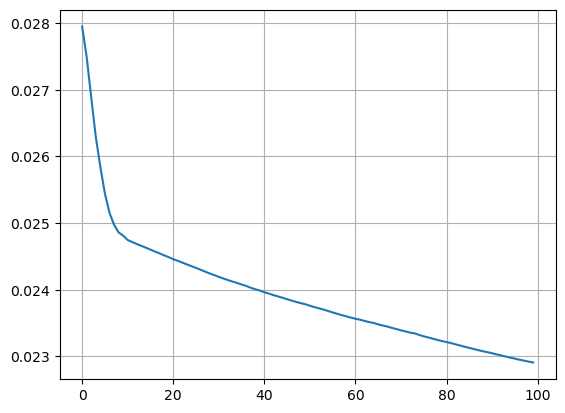

In [201]:
# График ошибки
plt.plot(model_modulus_MLP.loss_curve_)
plt.grid(True)
plt.show()

In [202]:
# Предсказание нейросети
preds_strength_MLP_train = model_modulus_MLP.predict(X_strength_train)
preds_strength_MLP_test = model_modulus_MLP.predict(X_strength_test)

# Оцениваем точность модели на тренировочной выборке
MAE_MLP_train = mean_absolute_error(y_strength_train, preds_strength_MLP_train)
MSE_MLP_train = mean_squared_error (y_strength_train, preds_strength_MLP_train)
r2_MLP_train = r2_score(y_strength_train, preds_strength_MLP_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_MLP_train) 
print('MSE_train:', MSE_MLP_train) 
print('r2_train', r2_MLP_train)

# Оцениваем точность модели на тестовой выборке
MAE_MLP_test = mean_absolute_error(y_strength_test, preds_strength_MLP_test)
MSE_MLP_test = mean_squared_error (y_strength_test, preds_strength_MLP_test)
r2_MLP_test = r2_score(y_strength_test, preds_strength_MLP_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_test:', MAE_MLP_test) 
print('MSE_test:', MSE_MLP_test) 
print('r2_test', r2_MLP_test)

Точность модели на тренировочных данных
MAE_train: 0.17003875862511678
MSE_train: 0.04595714626633545
r2_train -0.2707464513991944

Точность модели на тестовых данных
MAE_test: 0.17827726568024121
MSE_test: 0.04740466686185936
r2_test -0.3432091125624066


In [182]:
# Сравним модели с параметрами по умолчанию и с подобранными гиперпараметрами (метрика  r2, кросс-валидацция)
r2_cross_val_ = {'Регрессор': ['RIDGE',  'Lasso', 'KNeighbors', 'SVR',
                        'DecisionTree', 'RandomForestRegressor','GradientBoosting'], 
         'r2': [r2_cross_ridge2, r2_cross_lasso2, r2_cross_kn2, r2_cross_svr2,
                r2_cross_tree2, r2_cross_forest2, r2_cross_boost2],
         'r2_grich': [r2_cross_ridge_grid2, r2_cross_lasso_grid2, r2_cross_kn_grid2, r2_cross_svr_grid2,
                r2_cross_tree_grid2, r2_cross_forest_grid2, r2_cross_boost_grid2]
         } 

r2_cross_val_ = pd.DataFrame(r2_cross_val_)
r2_cross_val_

Регрессор        r2  r2_grich
0                  RIDGE -0.047330 -0.024205
1                  Lasso -0.022900 -0.022900
2             KNeighbors -0.209061 -0.043963
3                    SVR -0.211308 -0.023458
4           DecisionTree -1.219691 -0.025787
5  RandomForestRegressor -0.070684 -0.039038
6       GradientBoosting -0.097900 -0.021909

После подбора гиперпараметров модели стали лучше предсказывать значения, но качество модели по пержнему не подходит для данной задачи

In [203]:
# Сравниваем наши модели по метрикам для тренировочной и тестовой выборки
metrics_strength = {'Регрессор': ['DummerRegressor', 'LinearRegression', 'RIDGE',  'Lasso', 'KNeighbors', 'SVR',
                        'DecisionTree', 'RandomForestRegressor','GradientBoosting', 'MLP'], 
         'r2_train': [r2_dum_train, r2_lin_train, r2_ridge_train, r2_lasso_train, r2_KN_train, r2_svr_train,
                r2_tree_train, r2_forest_train, r2_boost_train, r2_MLP_train],
         'MAE_train': [MAE_dum_train, MAE_lin_train, MAE_ridge_train, MAE_lasso_train, MAE_KN_train, MAE_svr_train,
                 MAE_tree_train, MAE_forest_train, MAE_boost_train, MAE_MLP_train],
         'MSE_train': [MSE_dum_train, MSE_lin_train, MSE_ridge_train, MSE_lasso_train, MSE_KN_train, MSE_svr_train,
                 MSE_tree_train, MSE_forest_train, MSE_boost_train, MSE_MLP_train],
        'r2_val': [r2_dum_test, r2_lin_test, r2_ridge_test, r2_lasso_test, r2_KN_test, r2_svr_test,
                r2_tree_test, r2_forest_test, r2_boost_test, r2_MLP_test],
         'MAE_val': [MAE_dum_test, MAE_lin_test, MAE_ridge_test, MAE_lasso_test, MAE_KN_test, MAE_svr_test,
                 MAE_tree_test, MAE_forest_test, MAE_boost_test, MAE_MLP_test],
         'MSE_val': [MSE_dum_test, MSE_lin_test, MSE_ridge_test, MSE_lasso_test, MSE_KN_test, MSE_svr_test,
                 MSE_tree_test, MSE_forest_test, MSE_boost_test, MSE_MLP_test]
         } 

metrics_strength = pd.DataFrame(metrics_strength)
metrics_strength

Регрессор  r2_train  MAE_train  MSE_train    r2_val   MAE_val  \
0        DummerRegressor  0.000000   0.149737   0.036165 -0.000448  0.150899   
1       LinearRegression  0.024478   0.148639   0.035280  0.019179  0.148614   
2                  RIDGE  0.002543   0.149652   0.036074  0.001614  0.150597   
3                  Lasso  0.000000   0.149737   0.036165 -0.000448  0.150899   
4             KNeighbors  0.007590   0.150366   0.035891  0.005895  0.148810   
5                    SVR -0.000772   0.149729   0.036193 -0.003097  0.151215   
6           DecisionTree  0.022160   0.147278   0.035364  0.011766  0.149034   
7  RandomForestRegressor  0.039356   0.147241   0.034742  0.004423  0.150681   
8       GradientBoosting  0.021309   0.147325   0.035395  0.011509  0.149524   
9                    MLP -0.270746   0.170039   0.045957 -0.343209  0.178277   

    MSE_val  
0  0.035308  
1  0.034615  
2  0.035235  
3  0.035308  
4  0.035084  
5  0.035401  
6  0.034877  
7  0.035136  
8  0.034886  
9  0.047405

На тестовой выборке базовая модель  Лассо-регрессия показали r2 нулевыми значениями, метод ближайших векторов и многослойный перцептрона дали отрицательные значения, остальные модели показали положительный результат. Лучше всего отработал случайный лес (0.039). Значения MAE и MSE примерно одинаковые для моделей, только многослойный перцептрон показал значения чуть хуже.
На тестовой выборке положительные значения коэффициента детерминации показали все модели кроме базовой, лассо-регрессии и перцептрона. Лучший показатель у линейной регрессии (0.019). МAE и MSE в модели линейной регрессии имеют минимальное значение.


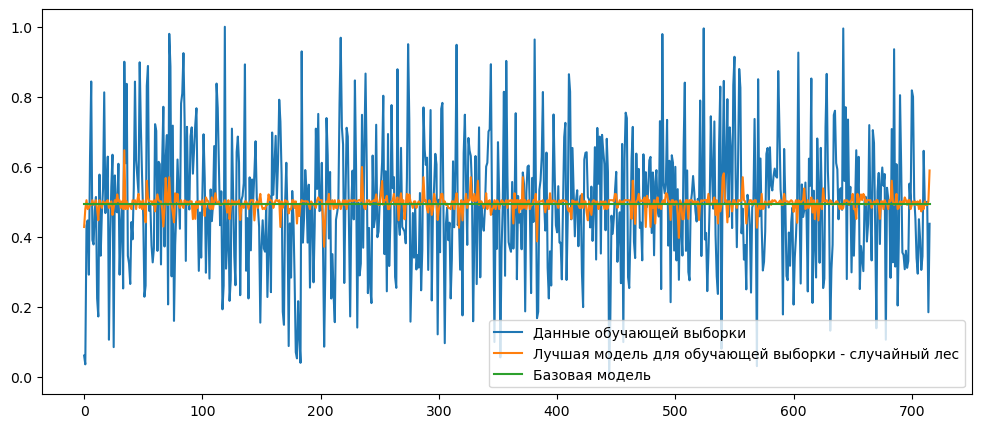

<Figure size 640x480 with 0 Axes>

In [213]:
# Визуализация для обучающей выборки
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_strength_train.values, label='Данные обучающей выборки')
ax.plot(preds_strength_forest_train, label='Лучшая модель для обучающей выборки - случайный лес')
ax.plot(preds_strength_dum_train, label='Базовая модель')
ax.legend()
plt.show()

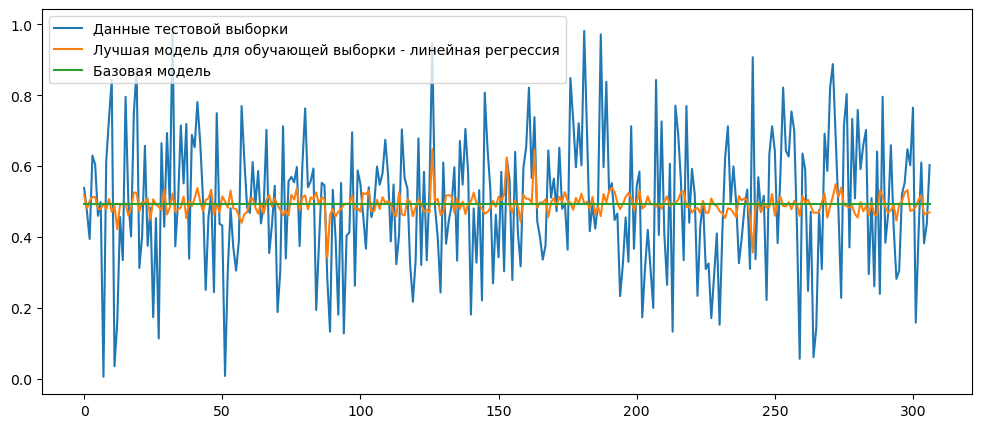

<Figure size 640x480 with 0 Axes>

In [215]:
# Визуализация для тестовой выборки
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y_strength_test.values, label='Данные тестовой выборки')
ax.plot(preds_strenght_lin_test, label='Лучшая модель для обучающей выборки - линейная регрессия')
ax.plot(preds_strength_dum_test, label='Базовая модель')
ax.legend()
plt.show()

Для эксперимента попробую посчитать точность модели линейной регрессии без добавления двух новых признаков, которые были образовани с помощью pca

In [136]:
df_norm.tail()

matrix_filler   density  elastic_modulus  hardener   epoxies      temp  \
1018       0.361662  0.444480         0.552781  0.337550  0.333908  0.703458   
1019       0.607674  0.704373         0.268550  0.749605  0.294428  0.362087   
1020       0.573391  0.498274         0.251612  0.501991  0.623085  0.334063   
1021       0.662497  0.748688         0.448724  0.717585  0.267818  0.466417   
1022       0.684036  0.280923         0.251903  0.632264  0.888354  0.588206   

      surface_density  tensile_modulus  tensile_strength  resin_consumption  \
1018         0.161609         0.475147          0.463043           0.207613   
1019         0.271207         0.464422          0.452087           0.182974   
1020         0.572959         0.578740          0.575296           0.585446   
1021         0.496511         0.535142          0.334513           0.451779   
1022         0.587373         0.551972          0.654075           0.443749   

      patch_angle  patch_step  patch_density  
1018          1.0    0.660946       0.336177  
1019          1.0    0.769393       0.450768  
1020          1.0    0.303017       0.687046  
1021          1.0    0.459730       0.527552  
1022          1.0    0.442668       0.853966

In [137]:
# Разделим обучающий датафрейм на целевую и входные переменные

X_strength_orig = df_norm.copy()
y_strength_orig = X_strength_orig.pop('tensile_strength')
X_strength_orig.shape, y_strength_orig.shape

((1023, 12), (1023,))

In [138]:
# Разделяю на тренировочную и тестовую выборки для задачи с целевой переменной 'Модуль упругости при растяжении, ГПа'
# По заданию размер тестовой выборки должен составлять 30% от всех данных. В обучающей выборке получилось 716 значений,
# в тестовой - 307.

X_strength_orig_train, X_strength_orig_test, y_strength_orig_train, y_strength_orig_test = train_test_split(X_strength_orig,
                                                                                                            y_strength_orig, 
                                                                                                            test_size=0.3, 
                                                                                                            random_state=42)
print('X_strength_orig_train:', X_strength_orig_train.shape, 'y_strength_orig_train:', y_strength_orig_train.shape)
print('X_strength_orig_test:', X_strength_orig_test.shape, 'y_strength_orig_test:', y_strength_orig_test.shape)

X_strength_orig_train: (716, 12) y_strength_orig_train: (716,)
X_strength_orig_test: (307, 12) y_strength_orig_test: (307,)


In [139]:
# Модель линейной регрессии для выборки с целевой переменной 'Прочность при растяжении, ГПа'
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_strength_orig_train, y_strength_orig_train)

preds_strenght_orig_lin_train = model_LinearRegression.predict(X_strength_orig_train)
preds_strenght_orig_lin_test = model_LinearRegression.predict(X_strength_orig_test)

# Оцениваем точность модели на тренировочной выборке
MAE_lin_train_orig = mean_absolute_error(y_strength_orig_train, preds_strenght_orig_lin_train)
MSE_lin_train_orig = mean_squared_error (y_strength_orig_train, preds_strenght_orig_lin_train)
r2_lin_train_orig = r2_score(y_strength_orig_train, preds_strenght_orig_lin_train)
print('Точность модели на тренировочных данных')
print('MAE_train:', MAE_lin_train_orig) 
print('MSE_train:', MSE_lin_train_orig) 
print('r2_train', r2_lin_train_orig)

# Оцениваем точность модели на тестовой выборке
MAE_lin_test_orig = mean_absolute_error(y_strength_orig_test, preds_strenght_orig_lin_test)
MSE_lin_test_orig = mean_squared_error (y_strength_orig_test, preds_strenght_orig_lin_test)
r2_lin_test_orig = r2_score(y_strength_orig_test, preds_strenght_orig_lin_test)
print('')
print('Точность модели на тестовых данных')
print('MAE_val:', MAE_lin_test_orig) 
print('MSE_val:', MSE_lin_test_orig) 
print('r2_val', r2_lin_test_orig)

Точность модели на тренировочных данных
MAE_train: 0.14932115225421713
MSE_train: 0.03558558273594912
r2_train 0.01603435686335175

Точность модели на тестовых данных
MAE_val: 0.14959075325325985
MSE_val: 0.034723182543501624
r2_val 0.016120177671260616


In [140]:
# Сравниваем наши модели по метрикам для тренировочной и тестовой выборки
metrics_lin_reg = {'Регрессор': ['LinearRegression_with_PCA', 'LinearRegression_original'], 
         'r2_train': [r2_lin_train, r2_lin_train_orig],
         'MAE_train': [MAE_lin_train, MAE_lin_train_orig],
         'MSE_train': [MSE_lin_train, MSE_lin_train_orig],
        'r2_test': [r2_lin_test, r2_lin_test_orig],
         'MAE_test': [MAE_lin_test, MAE_lin_test_orig],
         'MSE_test': [MSE_lin_test, MSE_lin_test_orig]
         } 

metrics_lin_reg = pd.DataFrame(metrics_lin_reg)
metrics_lin_reg

Регрессор  r2_train  MAE_train  MSE_train   r2_test  \
0  LinearRegression_with_PCA  0.024478   0.148639   0.035280  0.019179   
1  LinearRegression_original  0.016034   0.149321   0.035586  0.016120   

   MAE_test  MSE_test  
0  0.148614  0.034615  
1  0.149591  0.034723

Благодаря добавлению двух новых параметров удалось совсем немного улучшить метрики модели